# Data Analysis, and Model Creation project on UCI Heart Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
data=pd.read_csv(r"C:\Users\Rano's PC\Machine\💻data-science-projects\healthcare-dataset\heart_disease_uci.csv")

In [3]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
data.shape

(920, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
data.select_dtypes(include='number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   trestbps  861 non-null    float64
 3   chol      890 non-null    float64
 4   thalch    865 non-null    float64
 5   oldpeak   858 non-null    float64
 6   ca        309 non-null    float64
 7   num       920 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 57.6 KB


In [7]:
data.select_dtypes(exclude='number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   sex      920 non-null    object
 1   dataset  920 non-null    object
 2   cp       920 non-null    object
 3   fbs      830 non-null    object
 4   restecg  918 non-null    object
 5   exang    865 non-null    object
 6   slope    611 non-null    object
 7   thal     434 non-null    object
dtypes: object(8)
memory usage: 57.6+ KB


In [8]:
data.isnull().sum()/len(data)*100

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [11]:
#Renaming the columns for better understanding
data.rename(columns={'dataset':'location','cp':'c pain type','trestbps':'resting bp','chol':'cholesterol','fbs':'blood sugar','restecg':'ecg',
                     'thalch':'max heart rate','exang':'excercise angina','oldpeak':'st depression','ca':'affected coronary','thal':'thalassemia','num':'result'},inplace=True)

In [12]:
data.head()

,id,age,sex,location,c pain type,resting bp,cholesterol,blood sugar,ecg,max heart rate,excercise angina,st depression,slope,affected coronary,thalassemia,result
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [13]:
data.drop('id',axis=1,inplace=True)

In [14]:
round(data.select_dtypes(include='number').isnull().sum()/len(data.select_dtypes(include='number'))*100,2)

age                   0.00
resting bp            6.41
cholesterol           3.26
max heart rate        5.98
st depression         6.74
affected coronary    66.41
result                0.00
dtype: float64

In [15]:
round(data.select_dtypes(exclude='number').isnull().sum()/len(data.select_dtypes(include='number'))*100,2)

sex                  0.00
location             0.00
c pain type          0.00
blood sugar          9.78
ecg                  0.22
excercise angina     5.98
slope               33.59
thalassemia         52.83
dtype: float64

In [16]:
data.describe()

,age,resting bp,cholesterol,max heart rate,st depression,affected coronary,result
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [17]:
data.select_dtypes(include='number').columns.values

array(['age', 'resting bp', 'cholesterol', 'max heart rate',
       'st depression', 'affected coronary', 'result'], dtype=object)

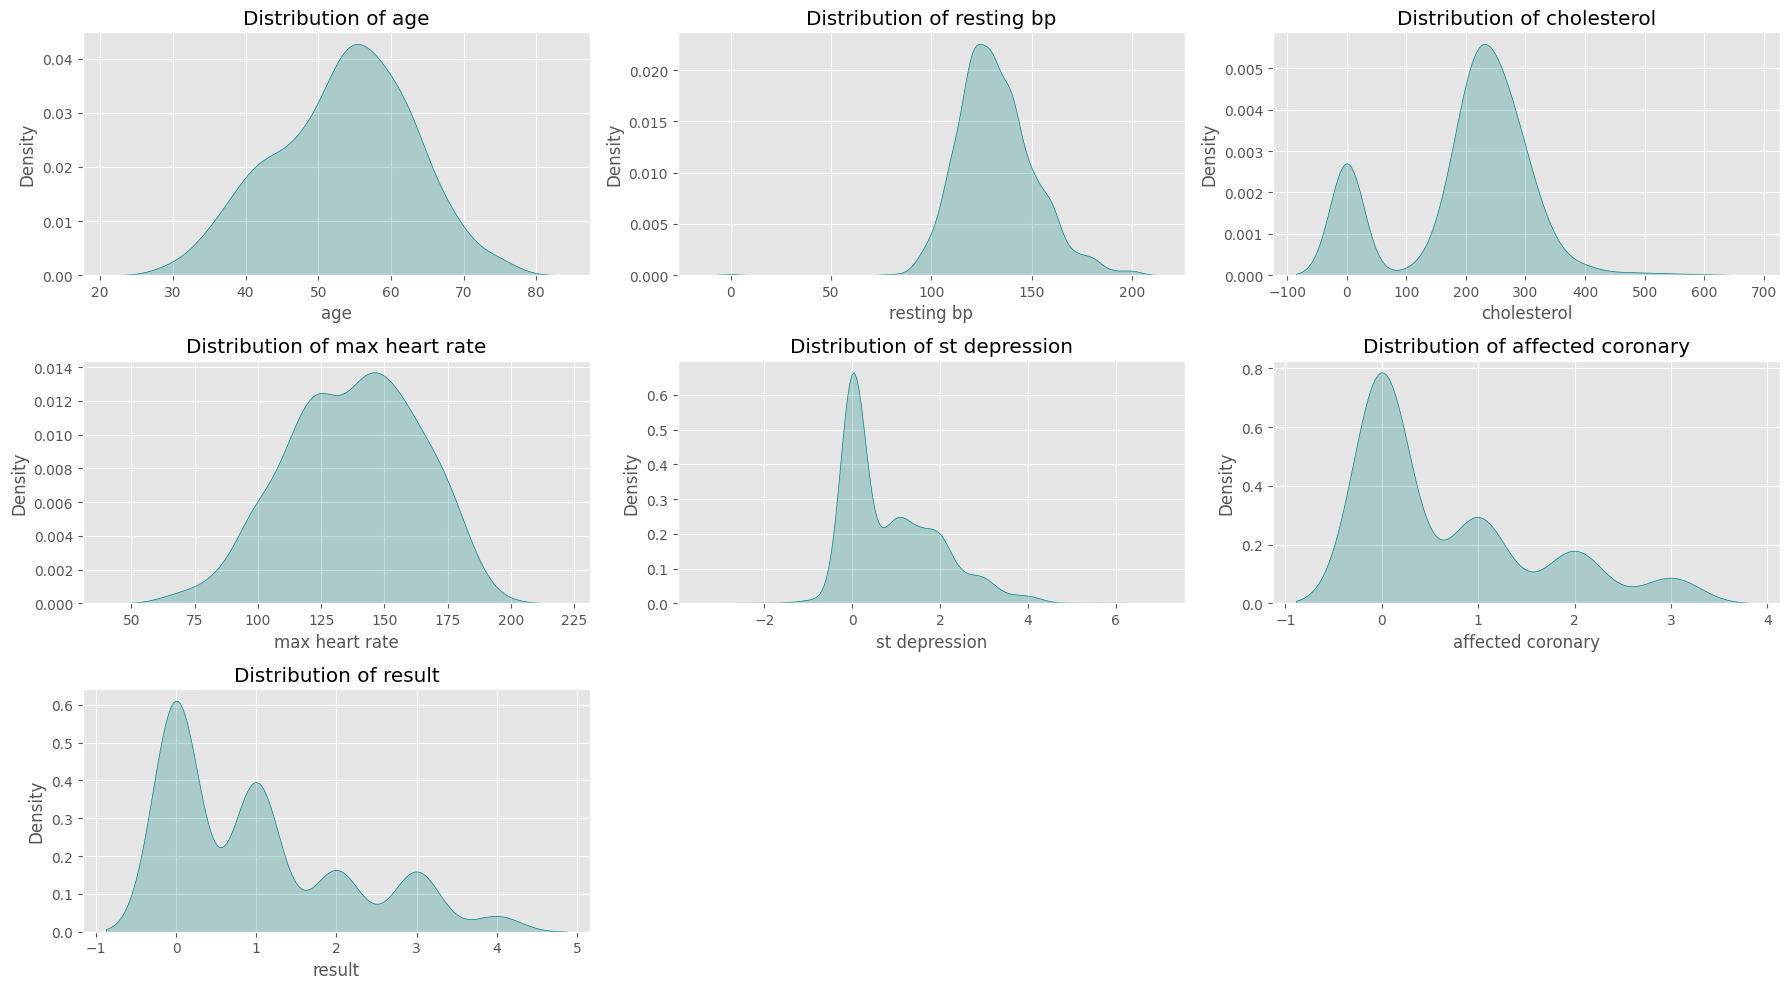

In [18]:
cols = ['age', 'resting bp', 'cholesterol', 'max heart rate', 'st depression', 'affected coronary', 'result']
df = data # Make sure your DataFrame is defined

# Set up subplot grid for 7 plots (let's do 3 rows × 3 cols to have enough room)
plt.figure(figsize=(18, 10))

for i, col in enumerate(cols):
    plt.subplot(3, 3, i + 1)  # 3x3 grid to fit 7 plots
    sns.kdeplot(df[col], color='teal', fill=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [19]:
data.select_dtypes(include='object').columns.values

array(['sex', 'location', 'c pain type', 'blood sugar', 'ecg',
       'excercise angina', 'slope', 'thalassemia'], dtype=object)

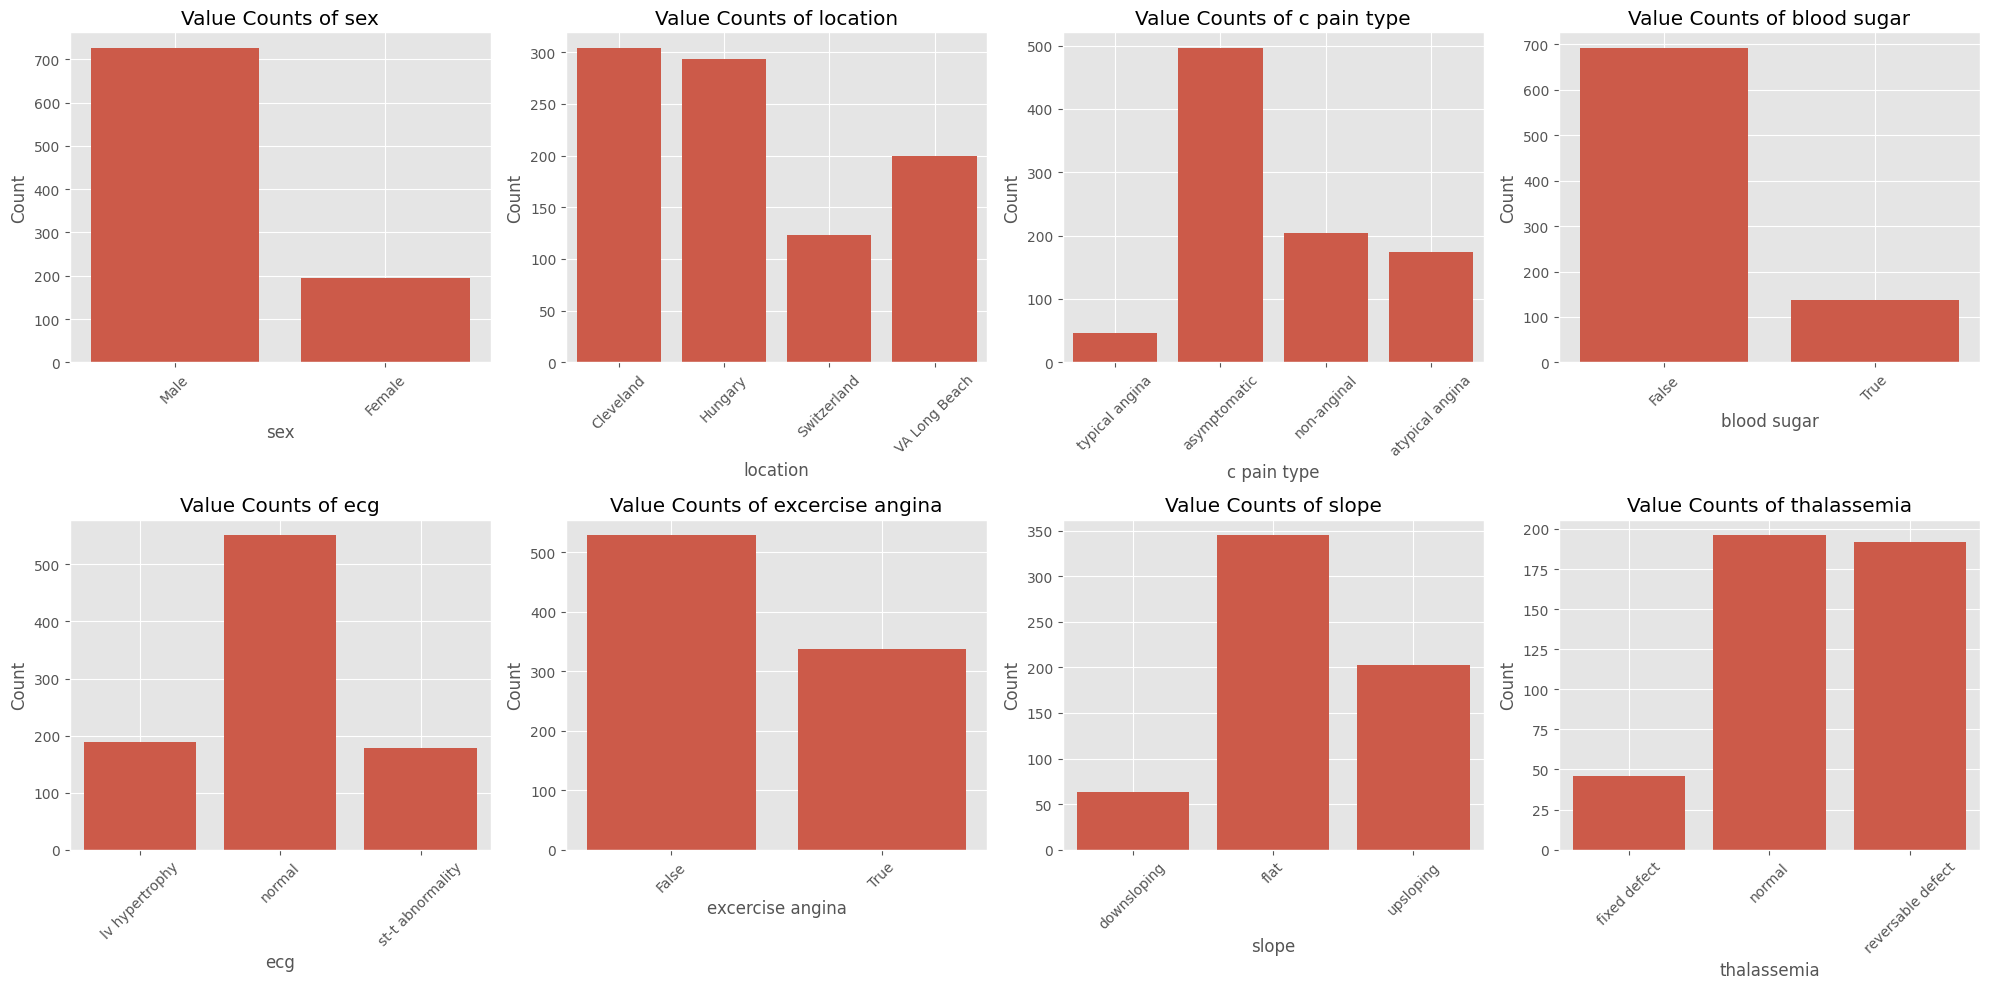

In [20]:
cols = ['sex', 'location', 'c pain type', 'blood sugar', 'ecg',
        'excercise angina', 'slope', 'thalassemia']

# Assuming your DataFrame is named df
plt.figure(figsize=(20, 10))  # Adjust width and height for readability

for i, col in enumerate(cols):
    plt.subplot(2, 4, i + 1)  # 2 rows, 4 columns
    sns.countplot(data=df, x=col)
    plt.title(f'Value Counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()

In [21]:
data[data['resting bp']==0].shape

(1, 15)

In [22]:
data['resting bp']=data['resting bp'].replace(0,np.nan)

In [23]:
data['cholesterol']=data['cholesterol'].replace(0,np.nan)

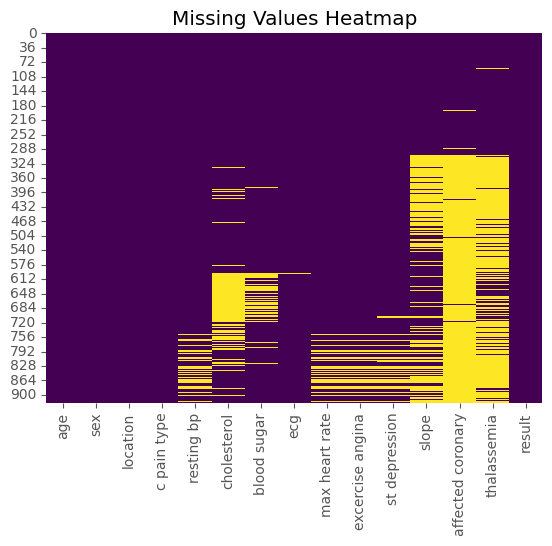

In [24]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

<Axes: >

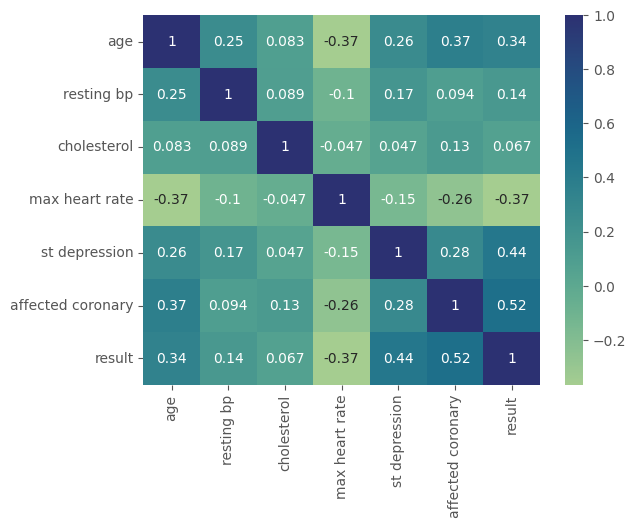

In [25]:
sns.heatmap(data.corr(numeric_only=True), cbar=True, cmap='crest',annot=True)

In [26]:
from sklearn.impute import KNNImputer,SimpleImputer

In [27]:
knn=KNNImputer(n_neighbors=5)

In [28]:
data[['resting bp','age','st depression','max heart rate']]

,resting bp,age,st depression,max heart rate
0,145.0,63,2.3,150.0
1,160.0,67,1.5,108.0
2,120.0,67,2.6,129.0
3,130.0,37,3.5,187.0
4,130.0,41,1.4,172.0
...,...,...,...,...
915,127.0,54,0.0,154.0
916,NaN,62,NaN,NaN
917,122.0,55,0.0,100.0
918,NaN,58,NaN,NaN


In [29]:
cols_to_impute_affected_coronary = ['resting bp', 'age', 'st depression', 'max heart rate']

# Apply KNN imputer
affected_coronary_imputer = KNNImputer(n_neighbors=3)
imputed_array = affected_coronary_imputer.fit_transform(data[cols_to_impute_affected_coronary])

# Replace only 'resting bp' in original DataFrame with imputed values
data['imputed resting bp'] = imputed_array[:, 0]

<Axes: xlabel='resting bp', ylabel='Density'>

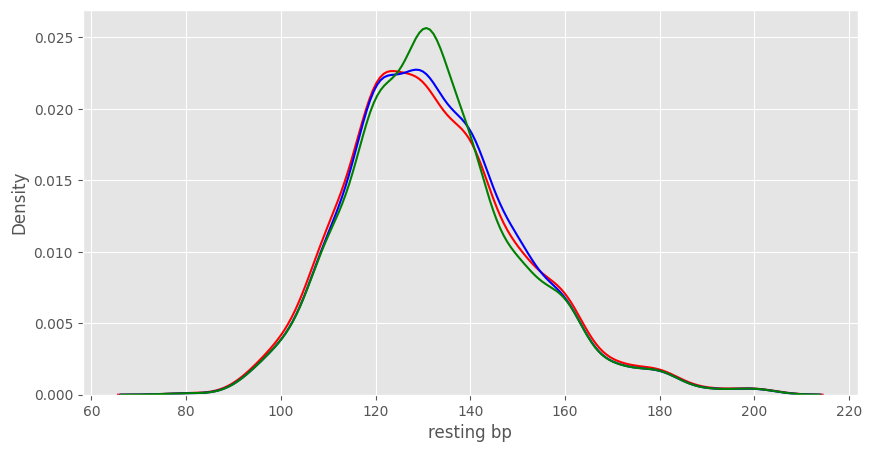

In [30]:
plt.figure(figsize=(10, 5))

sns.kdeplot(data['resting bp'], label='Original', color='red')
sns.kdeplot(data['imputed resting bp'], label='Imputed', color='blue')
sns.kdeplot(data['resting bp'].fillna(data['resting bp'].mean()),color='green')

In [31]:
cols_to_impute_cholesterol = ['resting bp','age','affected coronary','cholesterol']

# Apply KNN imputer
cholesterol_imputer = KNNImputer(n_neighbors=3)
imputed_array = cholesterol_imputer.fit_transform(data[cols_to_impute_cholesterol])

# Replace only 'resting bp' in original DataFrame with imputed values
data['imputed cholesterol'] = imputed_array[:, -1]

<Axes: xlabel='cholesterol', ylabel='Density'>

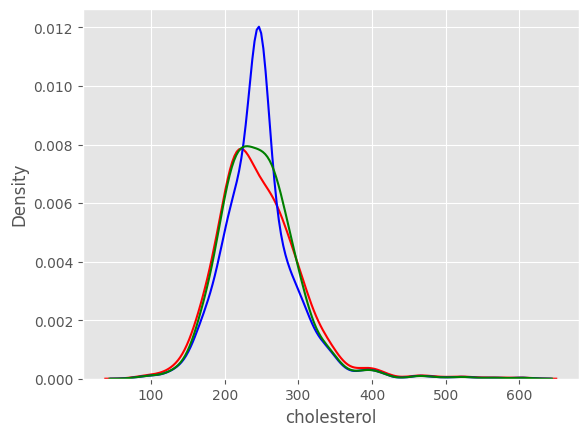

In [32]:
sns.kdeplot(data['cholesterol'],color='red')
sns.kdeplot(data['cholesterol'].fillna(data['cholesterol'].mean()),color='blue')
sns.kdeplot(data['imputed cholesterol'],color='green')

In [33]:
cols_to_impute_st_depression = ['age','resting bp','st depression','affected coronary','max heart rate']

# Apply KNN imputer
st_depression_imputer = KNNImputer(n_neighbors=3)
imputed_array = st_depression_imputer.fit_transform(data[cols_to_impute_st_depression])

# Replace only 'resting bp' in original DataFrame with imputed values
data['imputed max heart rate'] = imputed_array[:, -1]

<Axes: xlabel='max heart rate', ylabel='Density'>

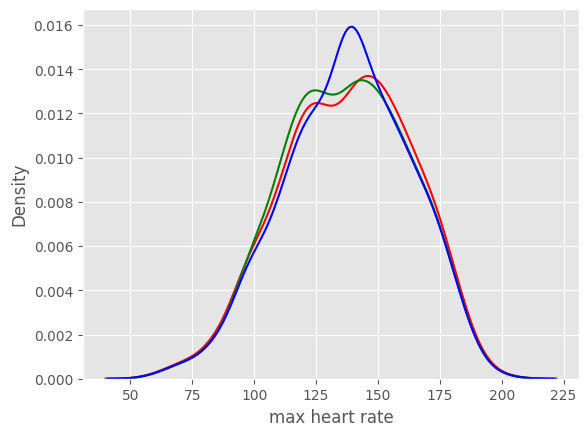

In [34]:
sns.kdeplot(data['max heart rate'],color='red')
sns.kdeplot(data['imputed max heart rate'],color='green')
sns.kdeplot(data['max heart rate'].fillna(data['max heart rate'].mean()),color='blue')

In [35]:
cols_to_impute_st_depression = ['age','resting bp','affected coronary','max heart rate','st depression']

# Apply KNN imputer
st_depression_imputer = KNNImputer(n_neighbors=3)
imputed_array = st_depression_imputer.fit_transform(data[cols_to_impute_st_depression])

# Replace only 'resting bp' in original DataFrame with imputed values
data['imputed st depression'] = imputed_array[:, -1]

<Axes: xlabel='st depression', ylabel='Density'>

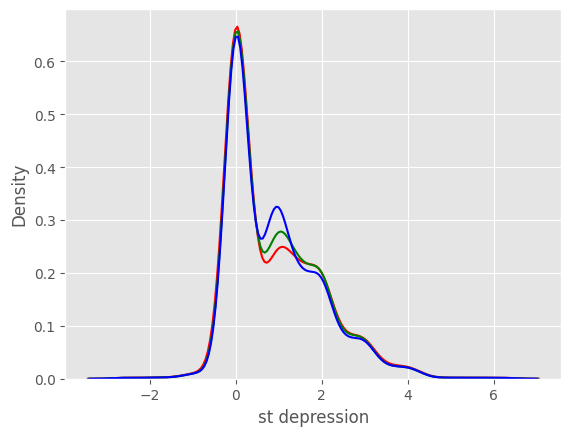

In [36]:
sns.kdeplot(data['st depression'],color='red')
sns.kdeplot(data['imputed st depression'],color='green')
sns.kdeplot(data['st depression'].fillna(data['st depression'].mean()),color='blue')

In [37]:
data['blood sugar']=data['blood sugar'].astype(str).str.strip()

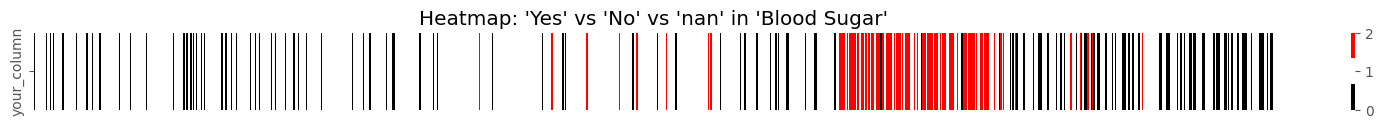

In [38]:
binary_column = data['blood sugar'].map({'False': 1, 'True': 0,'nan':2})

# Reshape to 2D for heatmap (row-wise visualization)
heatmap_data = binary_column.to_frame().T  # Transpose to get row with columns as positions

# Plot the heatmap
plt.figure(figsize=(20, 1))  # Wide plot for row-wise view
sns.heatmap(heatmap_data, cmap=['black', 'white','red'], cbar=True, xticklabels=False)
plt.title("Heatmap: 'Yes' vs 'No' vs 'nan' in 'Blood Sugar'")
plt.yticks([0.5], ['your_column'])
plt.show()


In [39]:
data['blood sugar']

0       True
1      False
2      False
3      False
4      False
       ...  
915     True
916    False
917     True
918     True
919    False
Name: blood sugar, Length: 920, dtype: object

In [40]:
data['blood sugar'].value_counts()/len(data)*100

blood sugar
False    75.217391
True     15.000000
nan       9.782609
Name: count, dtype: float64

In [41]:
data['blood sugar']=data['blood sugar'].str.replace('nan','False')

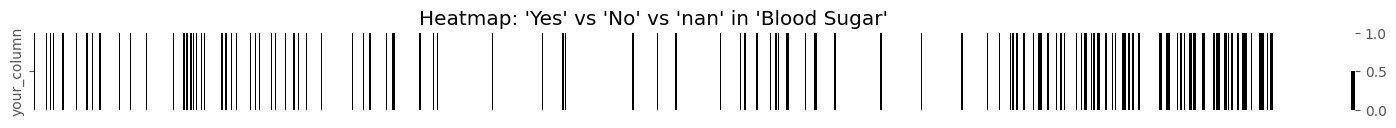

In [42]:
binary_column = data['blood sugar'].map({'False': 1, 'True': 0})

# Reshape to 2D for heatmap (row-wise visualization)
heatmap_data = binary_column.to_frame().T  # Transpose to get row with columns as positions

# Plot the heatmap
plt.figure(figsize=(20, 1))  # Wide plot for row-wise view
sns.heatmap(heatmap_data, cmap=['black', 'white'], cbar=True, xticklabels=False)
plt.title("Heatmap: 'Yes' vs 'No' vs 'nan' in 'Blood Sugar'")
plt.yticks([0.5], ['your_column'])
plt.show()

In [43]:
data['ecg'].value_counts()/len(data)*100

ecg
normal              59.891304
lv hypertrophy      20.434783
st-t abnormality    19.456522
Name: count, dtype: float64

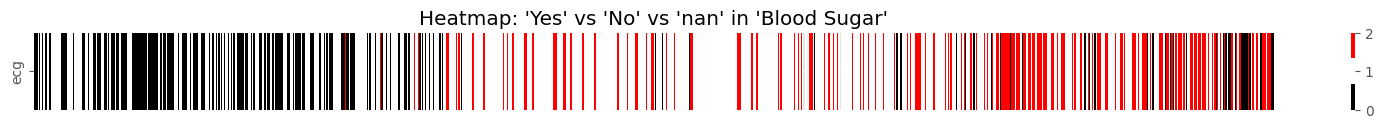

In [44]:
binary_column = data['ecg'].map({'normal': 1, 'lv hypertrophy': 0,'st-t abnormality':2})

# Reshape to 2D for heatmap (row-wise visualization)
heatmap_data = binary_column.to_frame().T  # Transpose to get row with columns as positions

# Plot the heatmap
plt.figure(figsize=(20, 1))  # Wide plot for row-wise view
sns.heatmap(heatmap_data, cmap=['black', 'white','red'], cbar=True, xticklabels=False)
plt.title("Heatmap: 'Yes' vs 'No' vs 'nan' in 'Blood Sugar'")
plt.yticks([0.5], ['ecg'])
plt.show()

In [45]:
ecg_imputer=SimpleImputer(strategy='most_frequent')

In [46]:
data[['ecg']]=ecg_imputer.fit_transform(data[['ecg']])

In [47]:
data['excercise angina']=data['excercise angina'].astype(str).str.strip()

In [48]:
data['excercise angina'].value_counts()/len(data)*100

excercise angina
False    57.391304
True     36.630435
nan       5.978261
Name: count, dtype: float64

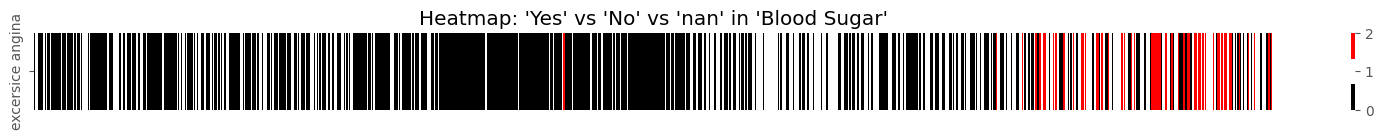

In [49]:
binary_column = data['excercise angina'].map({'True': 1, 'False': 0,'nan':2})

# Reshape to 2D for heatmap (row-wise visualization)
heatmap_data = binary_column.to_frame().T  # Transpose to get row with columns as positions

# Plot the heatmap
plt.figure(figsize=(20, 1))  # Wide plot for row-wise view
sns.heatmap(heatmap_data, cmap=['black', 'white','red'], cbar=True, xticklabels=False)
plt.title("Heatmap: 'Yes' vs 'No' vs 'nan' in 'Blood Sugar'")
plt.yticks([0.5], ['excersice angina'])
plt.show()

In [50]:
data['excercise angina'].value_counts()/len(data)*100

excercise angina
False    57.391304
True     36.630435
nan       5.978261
Name: count, dtype: float64

In [51]:
data['excercise angina']=data['excercise angina'].replace('nan','False')

In [52]:
data[['resting bp','cholesterol','max heart rate','st depression']]=data[['imputed resting bp','imputed cholesterol','imputed max heart rate','imputed st depression']]

In [53]:
data.drop(columns=['imputed resting bp','imputed cholesterol','imputed max heart rate','imputed st depression'],inplace=True)

In [54]:
data.isnull().sum()/len(data)*100

age                   0.000000
sex                   0.000000
location              0.000000
c pain type           0.000000
resting bp            0.000000
cholesterol           0.000000
blood sugar           0.000000
ecg                   0.000000
max heart rate        0.000000
excercise angina      0.000000
st depression         0.000000
slope                33.586957
affected coronary    66.413043
thalassemia          52.826087
result                0.000000
dtype: float64

In [55]:
pd.crosstab(data['thalassemia'],data['result'])

result,0,1,2,3,4
thalassemia,,,,,
fixed defect,11,13,12,7,3
normal,138,30,14,12,2
reversable defect,38,63,37,43,11


<Axes: xlabel='result', ylabel='thalassemia'>

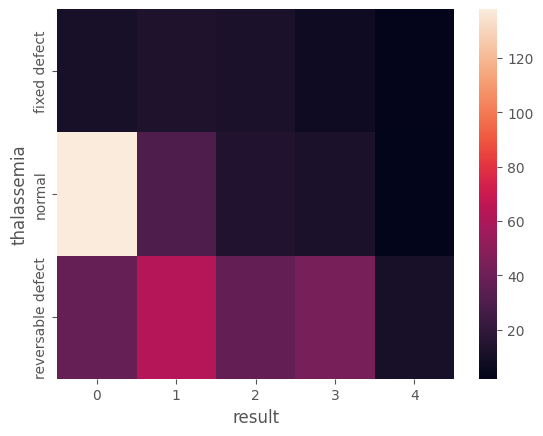

In [56]:
sns.heatmap(pd.crosstab(data['thalassemia'],data['result']))

In [57]:
data['thalassemia'].value_counts()

thalassemia
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [58]:
cols_to_impute_affected_coronary = ['cholesterol', 'age', 'st depression', 'max heart rate','result','affected coronary']

# Apply KNN imputer
affected_coronary_imputer = KNNImputer(n_neighbors=2)
imputed_array = affected_coronary_imputer.fit_transform(data[cols_to_impute_affected_coronary])

# Replace only 'resting bp' in original DataFrame with imputed values
data['imputed affected coronary'] = imputed_array[:, -1]

<Axes: xlabel='affected coronary', ylabel='Density'>

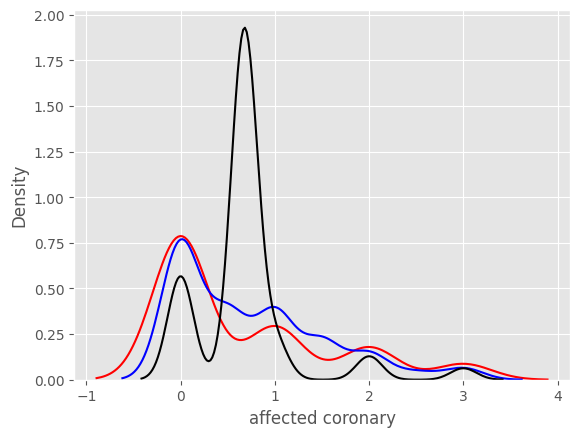

In [59]:
sns.kdeplot(data['affected coronary'],color='red')
sns.kdeplot(data['imputed affected coronary'],color='blue')
sns.kdeplot(data['affected coronary'].fillna(data['affected coronary'].mean()),color='black')

In [60]:
data['affected coronary']=data['imputed affected coronary']

In [61]:
data.isnull().sum()/len(data)*100

age                           0.000000
sex                           0.000000
location                      0.000000
c pain type                   0.000000
resting bp                    0.000000
cholesterol                   0.000000
blood sugar                   0.000000
ecg                           0.000000
max heart rate                0.000000
excercise angina              0.000000
st depression                 0.000000
slope                        33.586957
affected coronary             0.000000
thalassemia                  52.826087
result                        0.000000
imputed affected coronary     0.000000
dtype: float64

In [62]:
data['thalassemia'].value_counts()/len(data)*100

thalassemia
normal               21.304348
reversable defect    20.869565
fixed defect          5.000000
Name: count, dtype: float64

In [63]:
data['thalassemia']=data['thalassemia'].fillna('undefined')

In [64]:
data['thalassemia'].value_counts()

thalassemia
undefined            486
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [65]:
data['slope'].value_counts()

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

In [66]:
data['slope']=data['slope'].fillna('undefined')

In [67]:
data['slope'].value_counts()

slope
flat           345
undefined      309
upsloping      203
downsloping     63
Name: count, dtype: int64

In [68]:
data.isnull().sum()

age                          0
sex                          0
location                     0
c pain type                  0
resting bp                   0
cholesterol                  0
blood sugar                  0
ecg                          0
max heart rate               0
excercise angina             0
st depression                0
slope                        0
affected coronary            0
thalassemia                  0
result                       0
imputed affected coronary    0
dtype: int64

In [69]:
data.head()

,age,sex,location,c pain type,resting bp,cholesterol,blood sugar,ecg,max heart rate,excercise angina,st depression,slope,affected coronary,thalassemia,result,imputed affected coronary
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0.0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,3.0
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,2.0
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0.0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0.0


In [70]:
data['resting bp']=data['resting bp'].astype(int)

In [71]:
data['max heart rate']=data['max heart rate'].astype(int)

In [72]:
data.drop('imputed affected coronary',axis=1,inplace=True)

In [73]:
data.head()

,age,sex,location,c pain type,resting bp,cholesterol,blood sugar,ecg,max heart rate,excercise angina,st depression,slope,affected coronary,thalassemia,result
0,63,Male,Cleveland,typical angina,145,233.0,True,lv hypertrophy,150,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160,286.0,False,lv hypertrophy,108,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120,229.0,False,lv hypertrophy,129,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130,250.0,False,normal,187,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130,204.0,False,lv hypertrophy,172,False,1.4,upsloping,0.0,normal,0


# ANALYSIS OF DATA

## UNIVARIATE ANALYSIS

### UNIVARIATE ANALYSIS ON AGE COLUMN

In [74]:
data['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Density'>

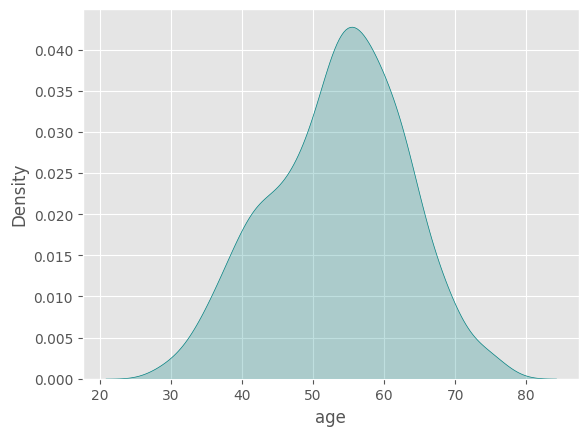

In [75]:
sns.kdeplot(data['age'],color='teal',fill=True)

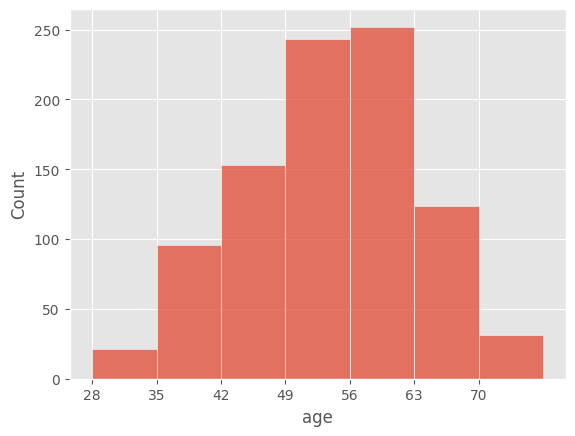

In [76]:
ticks=np.arange(data['age'].min(),data['age'].max(),7)
sns.histplot(data['age'],bins=7)
plt.xticks(ticks)
plt.show()

<Axes: ylabel='age'>

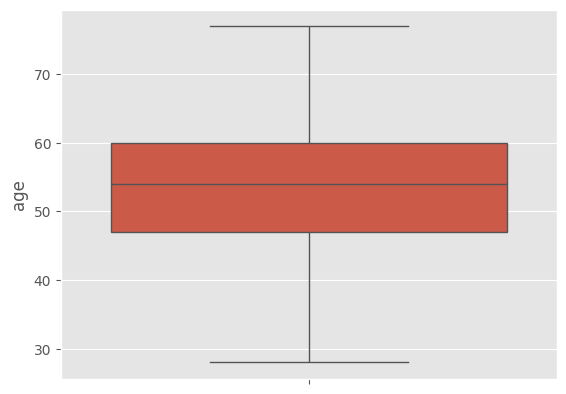

In [77]:
sns.boxplot(data['age'])

### UNIVARIATE ANALYSIS ON SEX COLUMN

<Axes: xlabel='sex'>

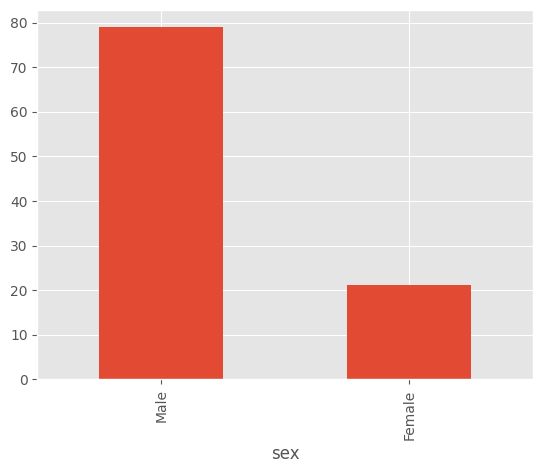

In [78]:
(data['sex'].value_counts()/len(data)*100).plot(kind='bar')

### UNIVARIATE ANALYSIS ON LOCATION COLUMN

<Axes: xlabel='location'>

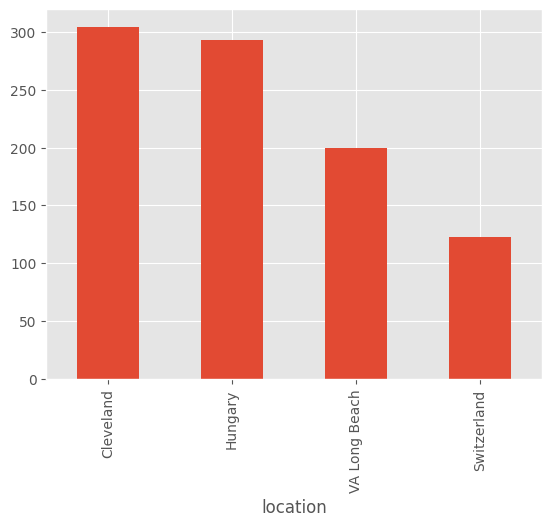

In [79]:
data['location'].value_counts().plot(kind='bar')

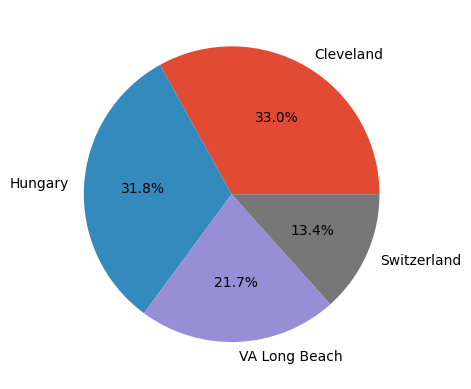

In [80]:
plt.pie(data['location'].value_counts(),labels=data['location'].value_counts().index,autopct='%1.1f%%')
plt.show()

### UNIVARIATE ANALYSIS ON CHEST PAIN TYPE COLUMN

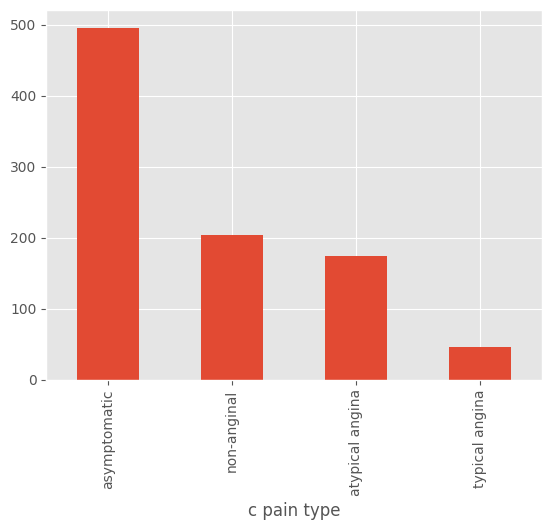

In [81]:
data['c pain type'].value_counts().plot(kind='bar')
plt.show()

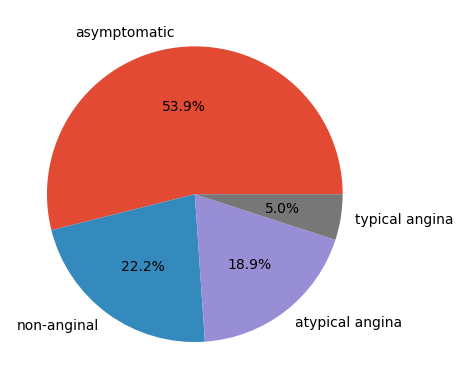

In [82]:
plt.pie(data['c pain type'].value_counts(),labels=data['c pain type'].value_counts().index,autopct='%1.1f%%')
plt.show()

### UNIVARIATE ANALYSIS ON RESTING BP COLUMN

In [83]:
data['resting bp'].describe()

count    920.000000
mean     132.455435
std       18.125430
min       80.000000
25%      120.000000
50%      130.000000
75%      140.250000
max      200.000000
Name: resting bp, dtype: float64

<Axes: xlabel='resting bp', ylabel='Density'>

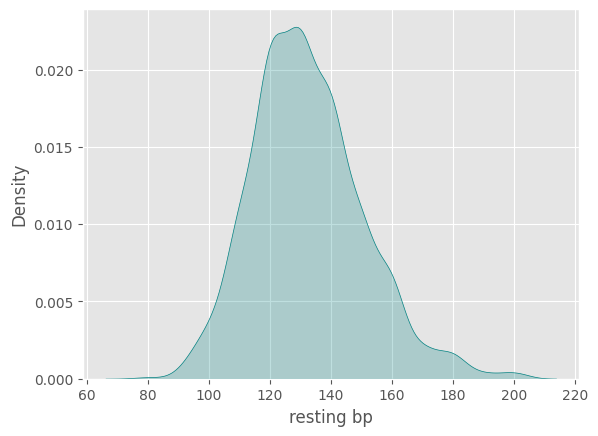

In [84]:
sns.kdeplot(data['resting bp'],color='teal',fill=True)

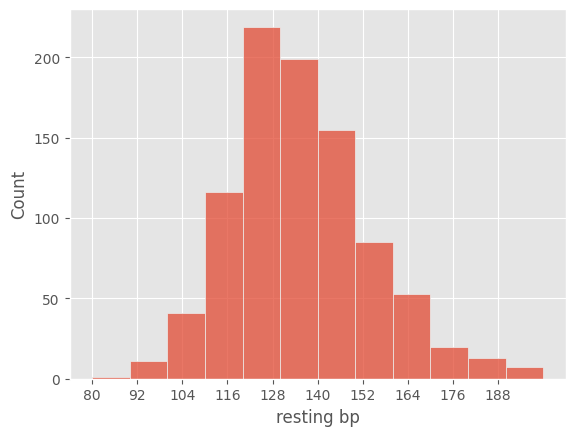

In [85]:
ticks=np.arange(80,200,12)
sns.histplot(data['resting bp'],bins=12)
plt.xticks(ticks)
plt.show()

<Axes: ylabel='resting bp'>

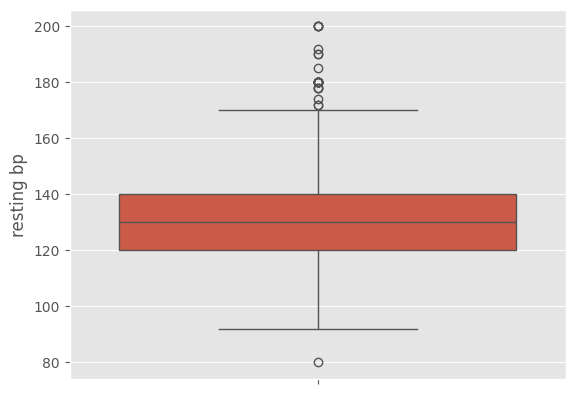

In [86]:
sns.boxplot(data['resting bp'])

In [87]:
upper_resting_bp_limit=data['resting bp'].quantile(.75)+1.5*(data['resting bp'].quantile(.75)-data['resting bp'].quantile(.25))
lower_resting_bp_limit=data['resting bp'].quantile(.25)-1.5*(data['resting bp'].quantile(.75)-data['resting bp'].quantile(.25))

In [88]:
data[data['resting bp']<lower_resting_bp_limit]

,age,sex,location,c pain type,resting bp,cholesterol,blood sugar,ecg,max heart rate,excercise angina,st depression,slope,affected coronary,thalassemia,result
644,53,Male,Switzerland,asymptomatic,80,196.333333,False,normal,141,True,2.0,downsloping,1.5,undefined,0


In [89]:
data[data['resting bp']>upper_resting_bp_limit]

,age,sex,location,c pain type,resting bp,cholesterol,blood sugar,ecg,max heart rate,excercise angina,st depression,slope,affected coronary,thalassemia,result
14,52,Male,Cleveland,non-anginal,172,199.000000,True,normal,162,False,0.5,upsloping,0.0,reversable defect,0
83,68,Male,Cleveland,non-anginal,180,274.000000,True,lv hypertrophy,150,True,1.6,flat,0.0,reversable defect,3
126,56,Female,Cleveland,asymptomatic,200,288.000000,True,lv hypertrophy,133,True,4.0,downsloping,2.0,reversable defect,3
172,59,Female,Cleveland,asymptomatic,174,249.000000,False,normal,143,True,0.0,flat,0.0,normal,1
183,59,Male,Cleveland,typical angina,178,270.000000,False,lv hypertrophy,145,False,4.2,downsloping,0.0,reversable defect,0
188,54,Male,Cleveland,atypical angina,192,283.000000,False,lv hypertrophy,195,False,0.0,upsloping,1.0,reversable defect,1
201,64,Female,Cleveland,asymptomatic,180,325.000000,False,normal,154,True,0.0,upsloping,0.0,normal,0
213,66,Female,Cleveland,asymptomatic,178,228.000000,True,normal,165,True,1.0,flat,2.0,reversable defect,3
231,55,Female,Cleveland,asymptomatic,180,327.000000,False,st-t abnormality,117,True,3.4,flat,0.0,normal,2
338,39,Male,Hungary,atypical angina,190,241.000000,False,normal,106,False,0.0,undefined,0.0,undefined,0


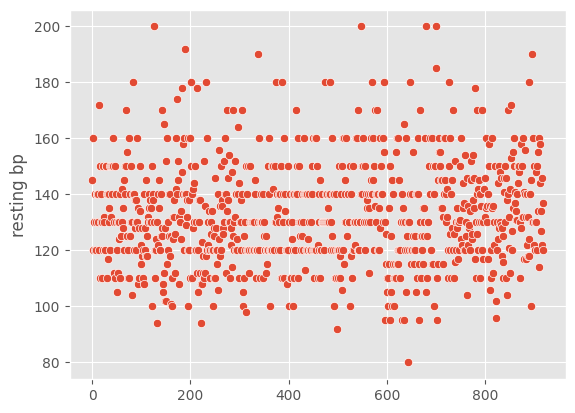

In [90]:
sns.scatterplot(data['resting bp'])
plt.show()

### UNIVARIATE ANALYSIS ON CHOLESTEROL COLUMN

In [91]:
data['cholesterol'].describe()

count    920.000000
mean     246.376449
std       53.991126
min       85.000000
25%      211.250000
50%      242.333333
75%      274.000000
max      603.000000
Name: cholesterol, dtype: float64

<Axes: xlabel='cholesterol', ylabel='Density'>

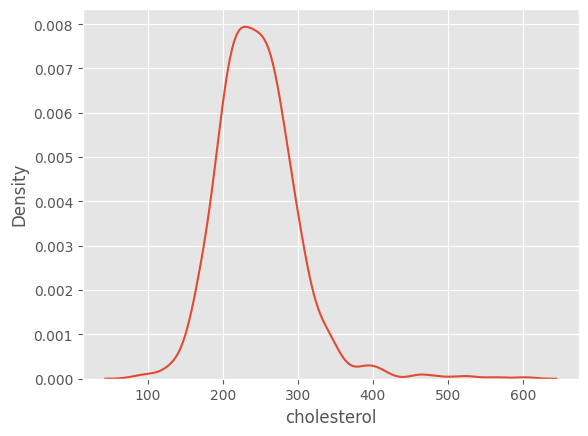

In [92]:
sns.kdeplot(data['cholesterol'])

<Axes: ylabel='cholesterol'>

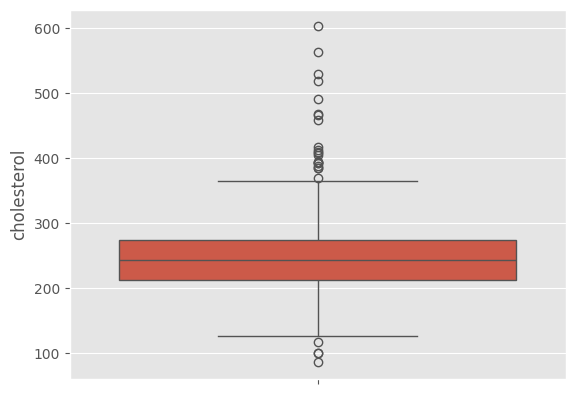

In [93]:
sns.boxplot(data['cholesterol'])

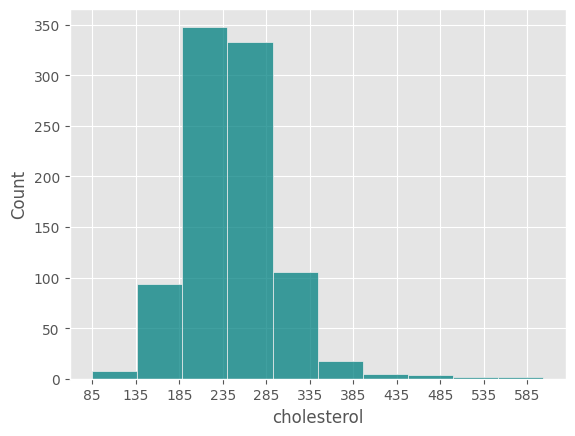

In [94]:
ticks=np.arange(85,615,50)
sns.histplot(data['cholesterol'],bins=10,color='teal')
plt.xticks(ticks)
plt.show()

In [95]:
len(data[(data['cholesterol']>185) & (data['cholesterol']<385)])/len(data)*100

88.80434782608695

### UNIVARIATE ANALYSIS ON BLOOD SUGAR COLUMN

In [96]:
data['blood sugar'].value_counts()

blood sugar
False    782
True     138
Name: count, dtype: int64

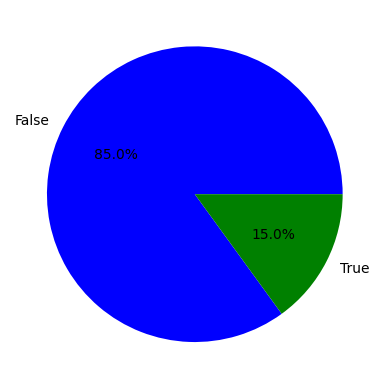

In [97]:
plt.pie(data['blood sugar'].value_counts().values,labels=data['blood sugar'].value_counts().index,autopct='%1.1f%%',colors='bgr')
plt.show()

### UNIVARIATE ANALYSIS ON ECG COLUMN

In [98]:
data['ecg'].value_counts()

ecg
normal              553
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

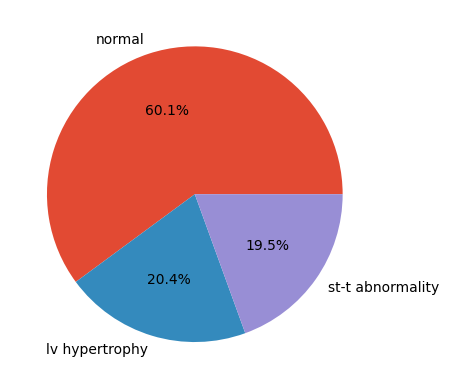

In [99]:
plt.pie(data['ecg'].value_counts().values,labels=data['ecg'].value_counts().index,autopct='%1.1f%%')
plt.show()

### UNIVARIATE ANALYSIS ON MAX HEART RATE COLUMN

In [100]:
data['max heart rate'].describe()

count    920.000000
mean     136.729348
std       25.598125
min       60.000000
25%      119.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: max heart rate, dtype: float64

<Axes: xlabel='max heart rate', ylabel='Density'>

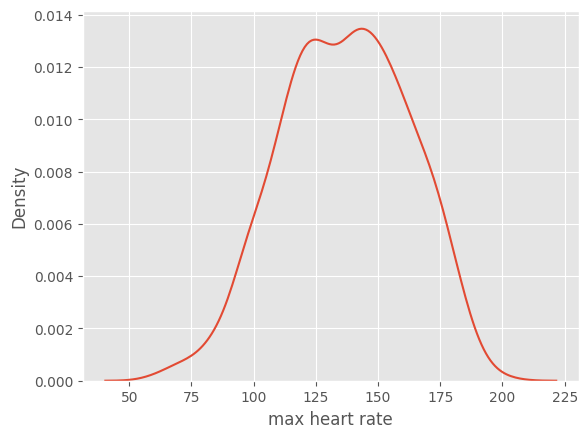

In [101]:
sns.kdeplot(data['max heart rate'])

In [102]:
data['max heart rate'].skew()

np.float64(-0.14302715680730274)

<Axes: ylabel='max heart rate'>

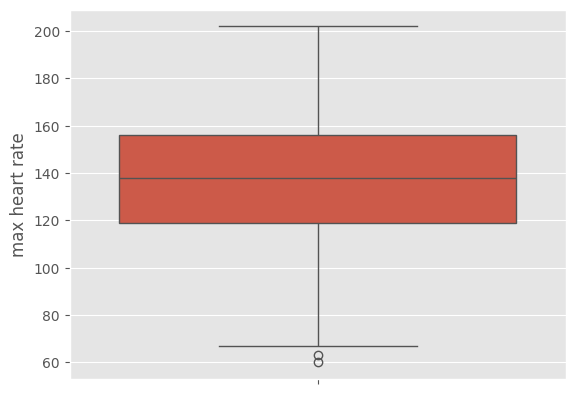

In [103]:
sns.boxplot(data['max heart rate'])

In [104]:
len(data[(data['max heart rate']>111) & (data['max heart rate']<161)])/len(data)*100

63.47826086956522

### UNIVARIATE ANALYSIS ON EXCERCISE ANGINA COLUMN

In [105]:
data['excercise angina'].value_counts()

excercise angina
False    583
True     337
Name: count, dtype: int64

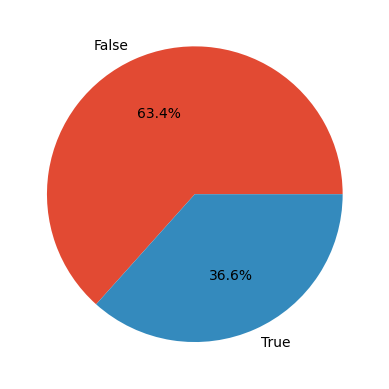

In [106]:
plt.pie(data['excercise angina'].value_counts().values,labels=data['excercise angina'].value_counts().index,autopct='%1.1f%%')
plt.show()

### UNIVARIATE ANALYSIS ON ST DEPRESSION COLUMN

In [107]:
data['st depression'].describe()

count    920.000000
mean       0.887754
std        1.068545
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: st depression, dtype: float64

<Axes: xlabel='st depression', ylabel='Density'>

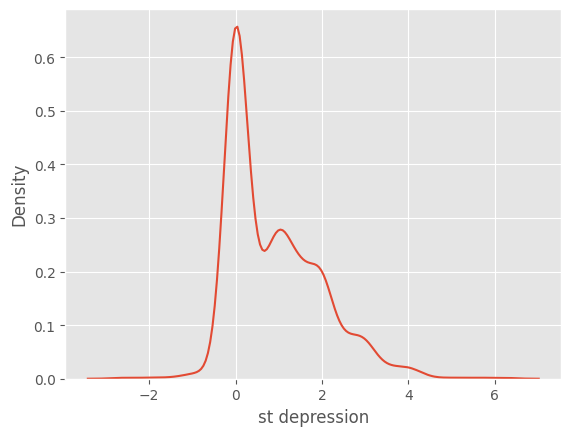

In [108]:
sns.kdeplot(data['st depression'])

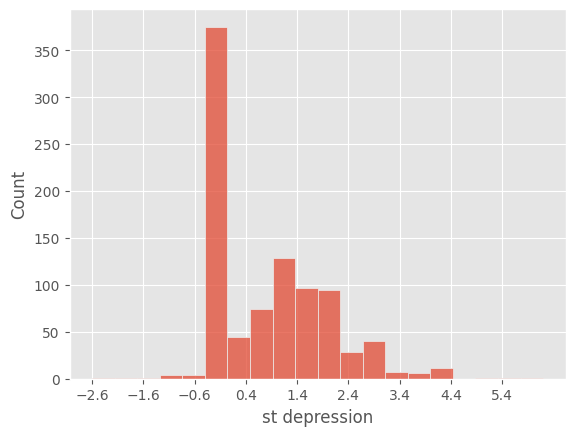

In [109]:
ticks=np.arange(-2.6,6.2,1)
sns.histplot(data['st depression'],bins=20)
plt.xticks(ticks)
plt.show()

In [110]:
data[data['st depression']<=-1]

,age,sex,location,c pain type,resting bp,cholesterol,blood sugar,ecg,max heart rate,excercise angina,st depression,slope,affected coronary,thalassemia,result
603,38,Male,Switzerland,non-anginal,100,215.333333,False,normal,179,False,-1.1,upsloping,0.0,undefined,0
609,42,Male,Switzerland,asymptomatic,105,234.333333,False,normal,128,True,-1.5,downsloping,0.5,undefined,1
615,46,Male,Switzerland,asymptomatic,100,235.000000,False,st-t abnormality,133,False,-2.6,flat,0.5,undefined,1
653,56,Male,Switzerland,non-anginal,125,246.333333,False,normal,98,False,-2.0,flat,1.0,reversable defect,2
655,56,Male,Switzerland,asymptomatic,115,225.333333,False,st-t abnormality,82,False,-1.0,upsloping,0.0,undefined,1
656,56,Male,Switzerland,asymptomatic,120,267.000000,False,st-t abnormality,100,True,-1.0,downsloping,1.5,reversable defect,2


<Axes: ylabel='st depression'>

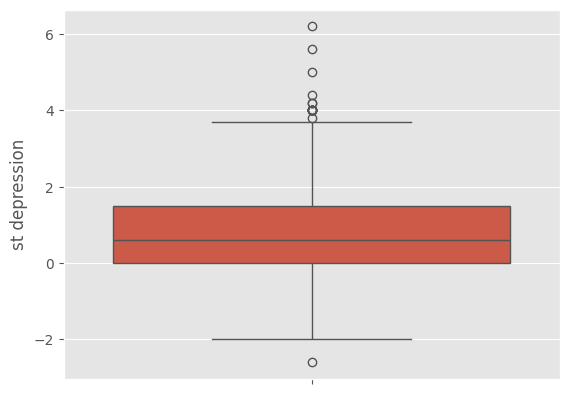

In [111]:
sns.boxplot(data['st depression'])

In [112]:
upper_st_depression_limit=data['st depression'].quantile(.75)+1.5*(data['st depression'].quantile(.75)-data['st depression'].quantile(.25))
lower_st_depression_limit=data['st depression'].quantile(.25)-1.5*(data['st depression'].quantile(.75)-data['st depression'].quantile(.25))

In [113]:
data[(data['st depression']>upper_st_depression_limit) | (data['st depression']<lower_st_depression_limit)].shape

(16, 15)

### UNIVARIATE ANALYSIS ON SLOPE COLUMN

In [114]:
data['slope'].value_counts()

slope
flat           345
undefined      309
upsloping      203
downsloping     63
Name: count, dtype: int64

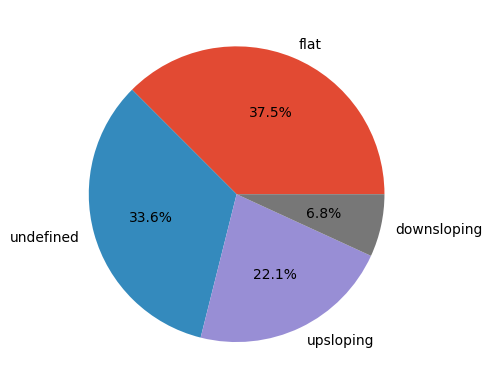

In [115]:
plt.pie(data['slope'].value_counts().values,labels=data['slope'].value_counts().index,autopct='%1.1f%%')
plt.show()

### UNIVARIATE ANALYSIS ON AFFECTED CORONARY COLUMN

In [116]:
data['affected coronary'].value_counts()

affected coronary
0.0    356
1.0    175
0.5    171
1.5    100
2.0     68
3.0     30
2.5     20
Name: count, dtype: int64

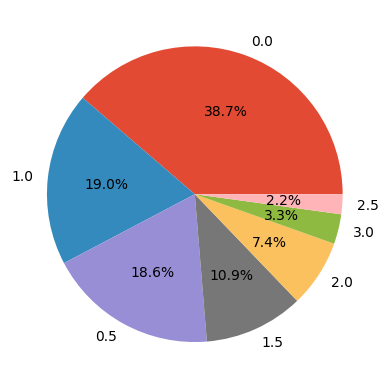

In [117]:
plt.pie(data['affected coronary'].value_counts().values,labels=data['affected coronary'].value_counts().index,autopct='%1.1f%%')
plt.show()

### UNIVARIATE ANALYSIS ON THALASSEMIA COLUMN

In [118]:
data['thalassemia'].value_counts()

thalassemia
undefined            486
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

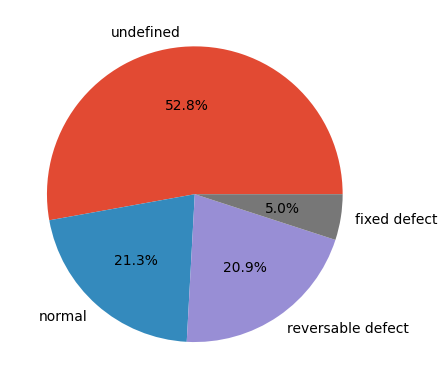

In [119]:
plt.pie(data['thalassemia'].value_counts().values,labels=data['thalassemia'].value_counts().index,autopct='%1.1f%%')
plt.show()

### UNIVARIATE ANALYSIS ON RESULT COLUMN

In [120]:
data['result'].value_counts()

result
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

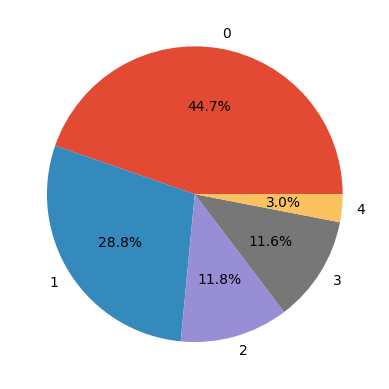

In [121]:
plt.pie(data['result'].value_counts().values,labels=data['result'].value_counts().index,autopct='%1.1f%%')
plt.show()

## BIVARIATE ANALYSIS

### AGE WITH RESULT

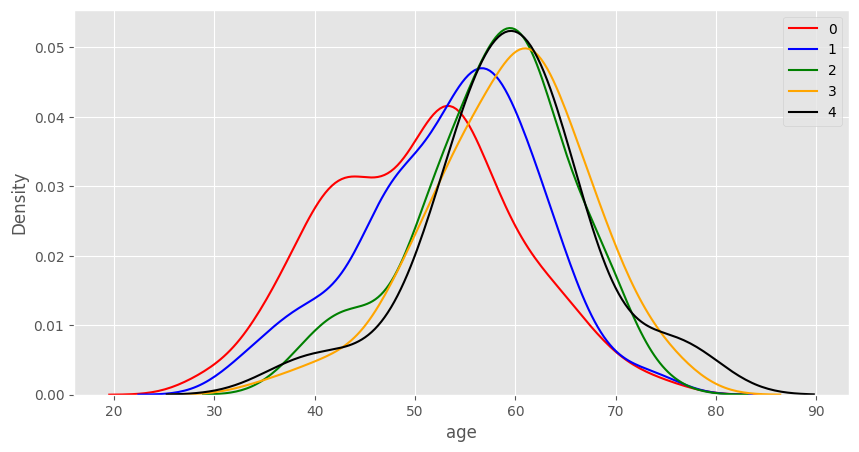

In [122]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data[data['result']==0]['age'],color='red')
sns.kdeplot(data[data['result']==1]['age'],color='blue')
sns.kdeplot(data[data['result']==2]['age'],color='green')
sns.kdeplot(data[data['result']==3]['age'],color='orange')
sns.kdeplot(data[data['result']==4]['age'],color='black')
plt.legend('01234')
plt.show()


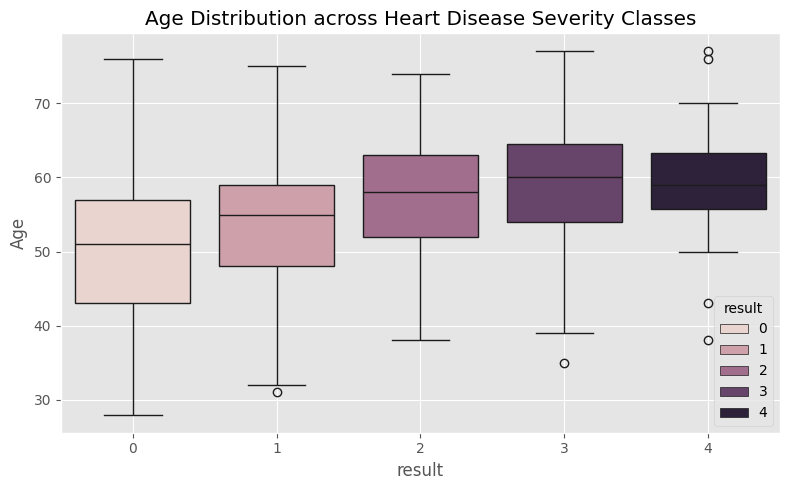

In [123]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='result', y='age',hue='result')
plt.title('Age Distribution across Heart Disease Severity Classes')
plt.ylabel('Age')
plt.grid(True)
plt.tight_layout()
plt.show()

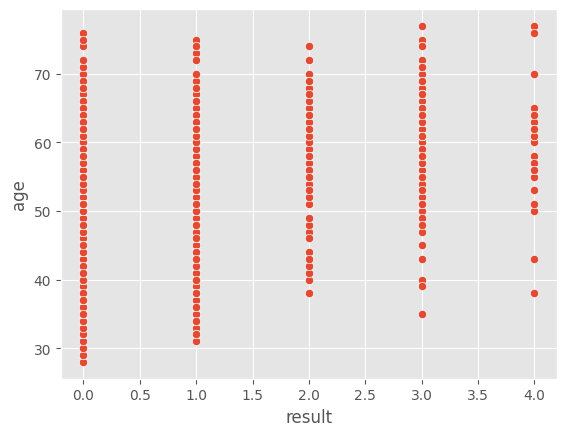

In [124]:
sns.scatterplot(x='result',y='age',data=data)
plt.show()

In [125]:
import math

In [126]:
def corr_and_coef(column,anothercolumn,dataset):
    corr=dataset[column].corr(dataset[anothercolumn])
    print("The corelation is: ",round(corr,2))
    print('The percentage of variability is: ' ,int(round(math.pow(corr,2),2)*100),"%")

In [127]:
corr_and_coef('result','age',data)

The corelation is:  0.34
The percentage of variability is:  12 %


### SEX WITH RESULT

<Axes: xlabel='sex'>

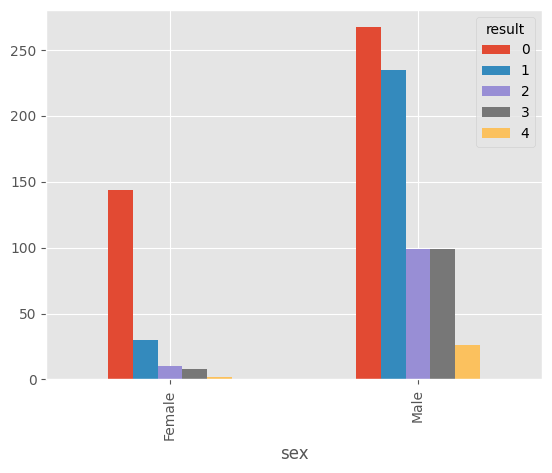

In [128]:
pd.crosstab(data['sex'],data['result']).plot(kind='bar')

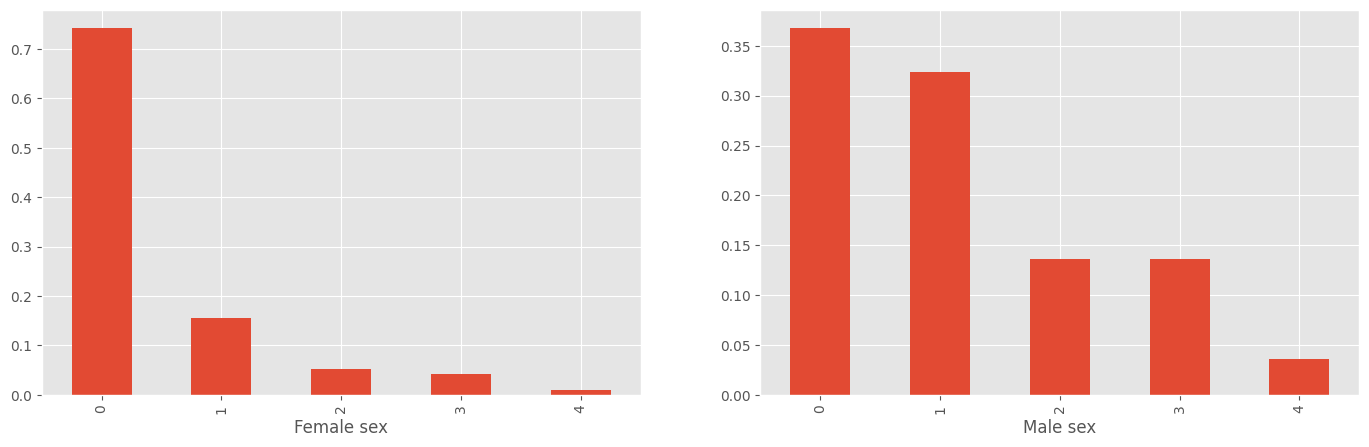

In [129]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
(data[data['sex']=='Female']['result'].value_counts()/len(data[data['sex']=='Female'])).plot(kind='bar')
plt.xlabel('Female sex')
plt.subplot(1,2,2)
(data[data['sex']=='Male']['result'].value_counts()/len(data[data['sex']=='Male'])).plot(kind='bar')
plt.xlabel('Male sex')
plt.show()

In [130]:
data['numerical sex value']=data['sex'].apply(lambda x: 1 if 'Male' in x else 0)

In [131]:
corr_and_coef('numerical sex value','result',data)

The corelation is:  0.26
The percentage of variability is:  7 %


### LOCATION WITH RESULT

In [132]:
data['location'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

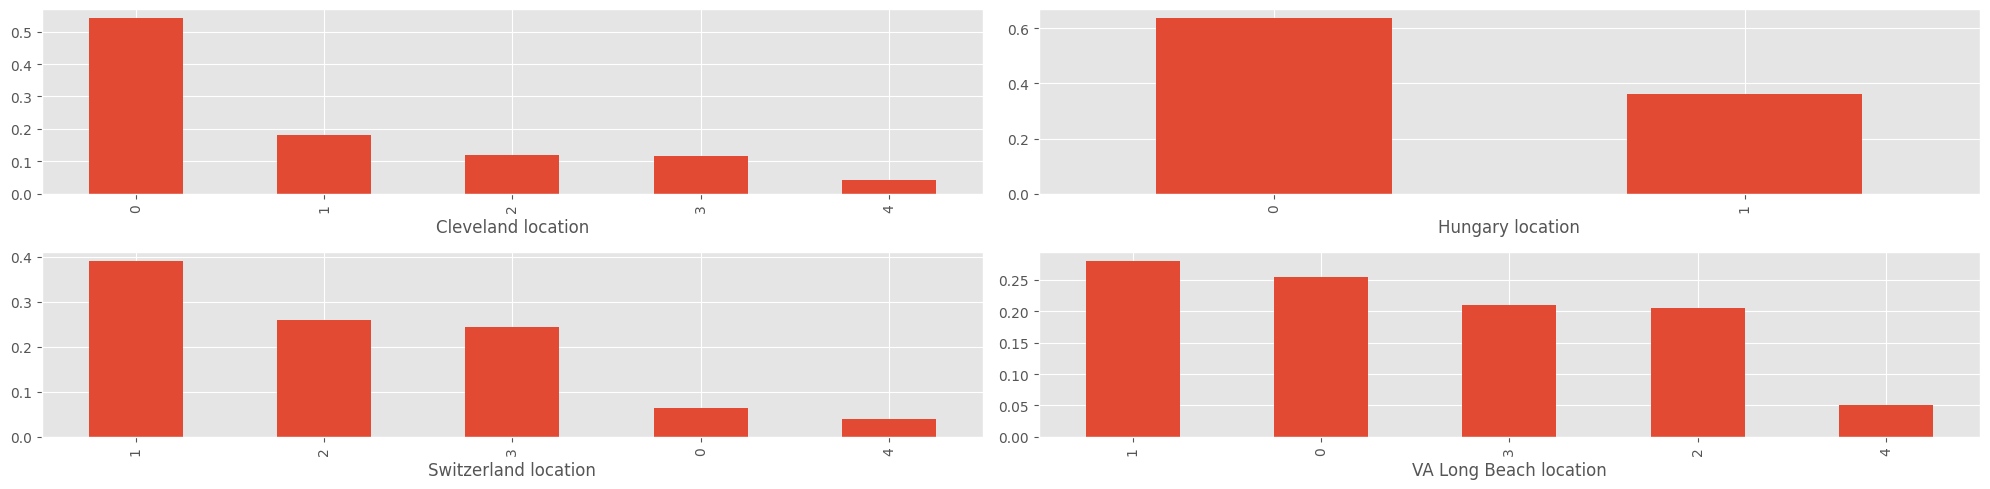

In [133]:
plt.figure(figsize=(20,5))
plt.subplot(2,2,1)
(data[data['location']=='Cleveland']['result'].value_counts()/len(data[data['location']=='Cleveland'])).plot(kind='bar')
plt.xlabel('Cleveland location')
plt.subplot(2,2,2)
(data[data['location']=='Hungary']['result'].value_counts()/len(data[data['location']=='Hungary'])).plot(kind='bar')
plt.xlabel('Hungary location')
plt.subplot(2,2,3)
(data[data['location']=='Switzerland']['result'].value_counts()/len(data[data['location']=='Switzerland'])).plot(kind='bar')
plt.xlabel('Switzerland location')
plt.subplot(2,2,4)
(data[data['location']=='VA Long Beach']['result'].value_counts()/len(data[data['location']=='VA Long Beach'])).plot(kind='bar')
plt.xlabel('VA Long Beach location')
plt.tight_layout()
plt.show()

In [134]:
from sklearn.preprocessing import LabelEncoder

In [135]:
location_encoder=LabelEncoder()

In [136]:
data['location encoded']=pd.DataFrame(location_encoder.fit_transform(data['location']))

In [137]:
corr_and_coef('location encoded','result',data)

The corelation is:  0.28
The percentage of variability is:  8 %


In [138]:
dict(zip(location_encoder.classes_, location_encoder.transform(location_encoder.classes_)))

{'Cleveland': np.int64(0),
 'Hungary': np.int64(1),
 'Switzerland': np.int64(2),
 'VA Long Beach': np.int64(3)}

### C PAIN TYPE WITH RESULT

In [139]:
data['c pain type'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

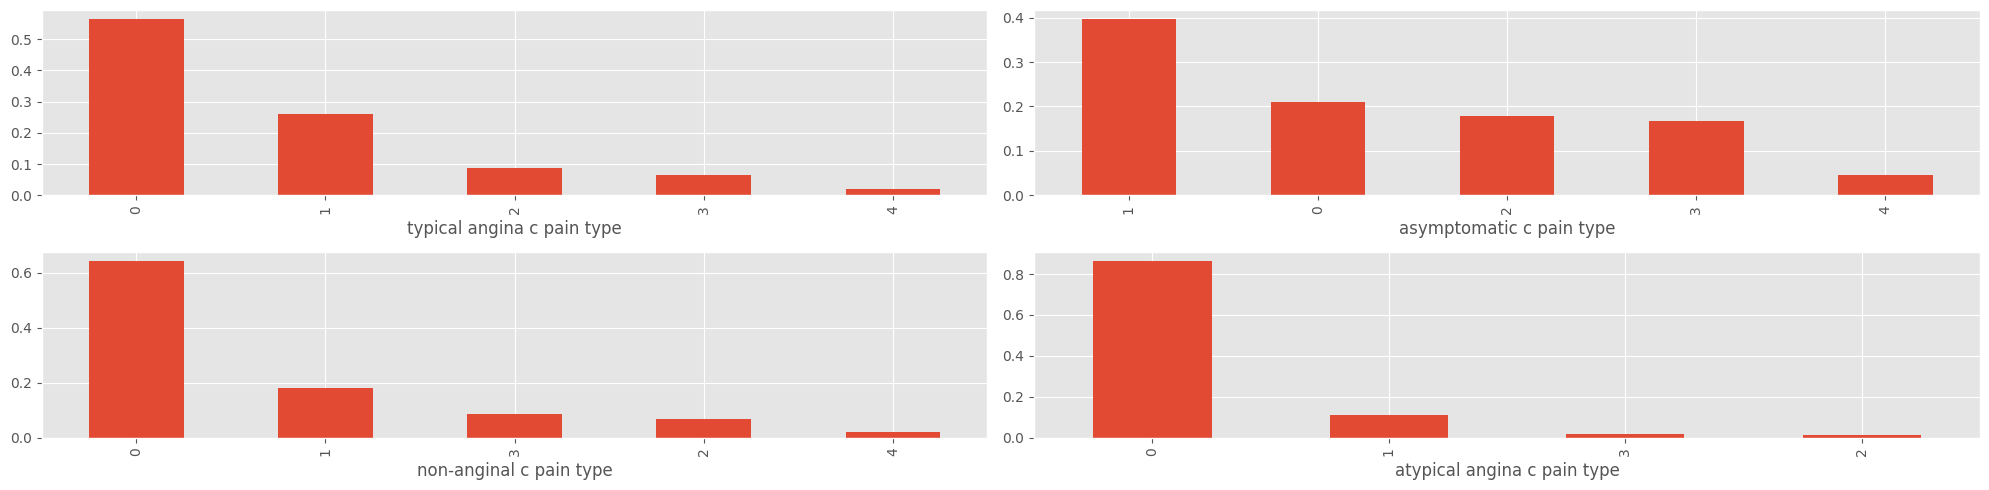

In [140]:
plt.figure(figsize=(20,5))
plt.subplot(2,2,1)
(data[data['c pain type']=='typical angina']['result'].value_counts()/len(data[data['c pain type']=='typical angina'])).plot(kind='bar')
plt.xlabel('typical angina c pain type')
plt.subplot(2,2,2)
(data[data['c pain type']=='asymptomatic']['result'].value_counts()/len(data[data['c pain type']=='asymptomatic'])).plot(kind='bar')
plt.xlabel('asymptomatic c pain type')
plt.subplot(2,2,3)
(data[data['c pain type']=='non-anginal']['result'].value_counts()/len(data[data['c pain type']=='non-anginal'])).plot(kind='bar')
plt.xlabel('non-anginal c pain type')
plt.subplot(2,2,4)
(data[data['c pain type']=='atypical angina']['result'].value_counts()/len(data[data['c pain type']=='atypical angina'])).plot(kind='bar')
plt.xlabel('atypical angina c pain type')
plt.tight_layout()
plt.show()

In [141]:
cpain_encoder=LabelEncoder()

In [142]:
data['c pain encoded']=pd.DataFrame(cpain_encoder.fit_transform(data['c pain type']))

### RESTING BP WITH RESULT

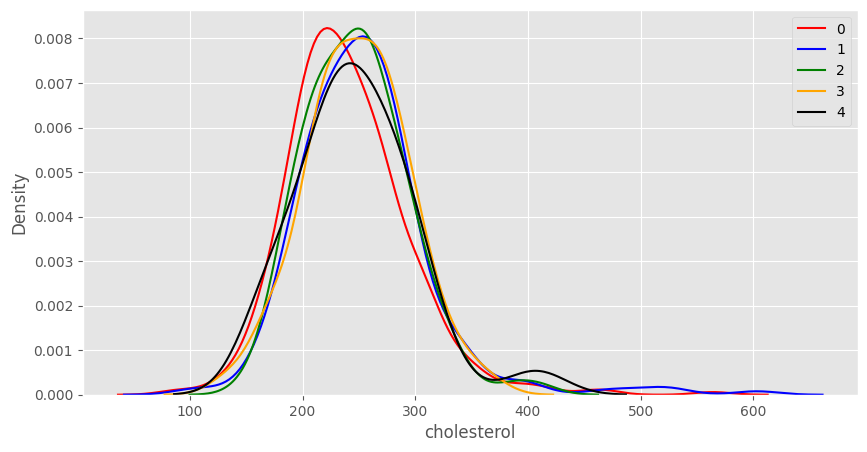

In [143]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data[data['result']==0]['cholesterol'],color='red')
sns.kdeplot(data[data['result']==1]['cholesterol'],color='blue')
sns.kdeplot(data[data['result']==2]['cholesterol'],color='green')
sns.kdeplot(data[data['result']==3]['cholesterol'],color='orange')
sns.kdeplot(data[data['result']==4]['cholesterol'],color='black')
plt.legend('01234')
plt.show()


<Axes: xlabel='result', ylabel='resting bp'>

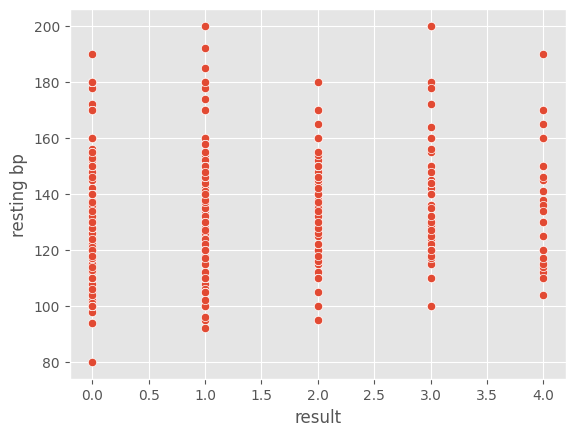

In [144]:
sns.scatterplot(x='result',y='resting bp',data=data)

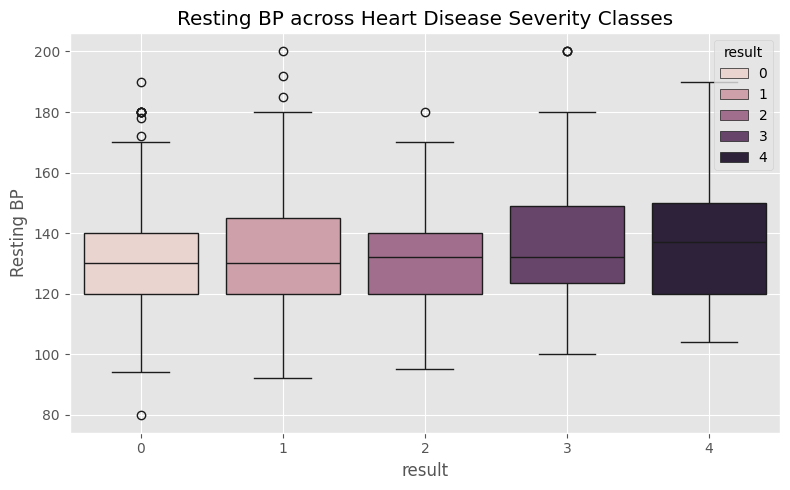

In [145]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='result', y='resting bp',hue='result')
plt.title('Resting BP across Heart Disease Severity Classes')
plt.ylabel('Resting BP')
plt.grid(True)
plt.tight_layout()
plt.show()

In [146]:
corr_and_coef('result','resting bp',data)

The corelation is:  0.13
The percentage of variability is:  2 %


### CHOLESTEROL WITH RESULT

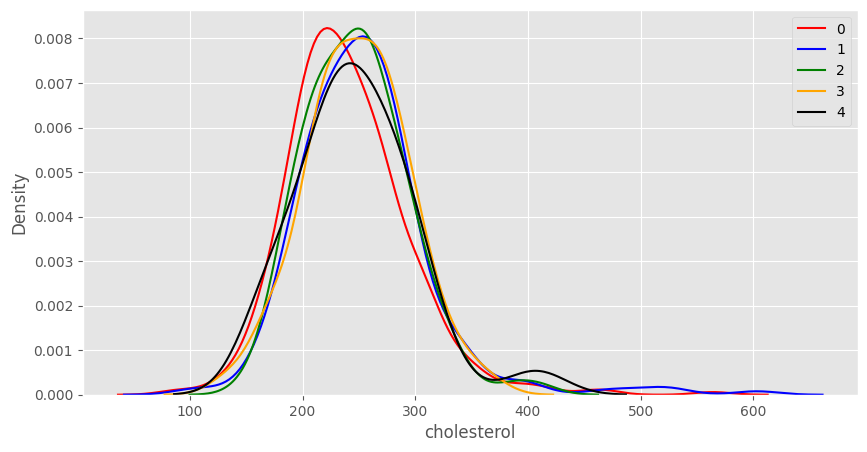

In [147]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data[data['result']==0]['cholesterol'],color='red')
sns.kdeplot(data[data['result']==1]['cholesterol'],color='blue')
sns.kdeplot(data[data['result']==2]['cholesterol'],color='green')
sns.kdeplot(data[data['result']==3]['cholesterol'],color='orange')
sns.kdeplot(data[data['result']==4]['cholesterol'],color='black')
plt.legend('01234')
plt.show()


In [148]:
corr_and_coef('cholesterol','result',data)

The corelation is:  0.06
The percentage of variability is:  0 %


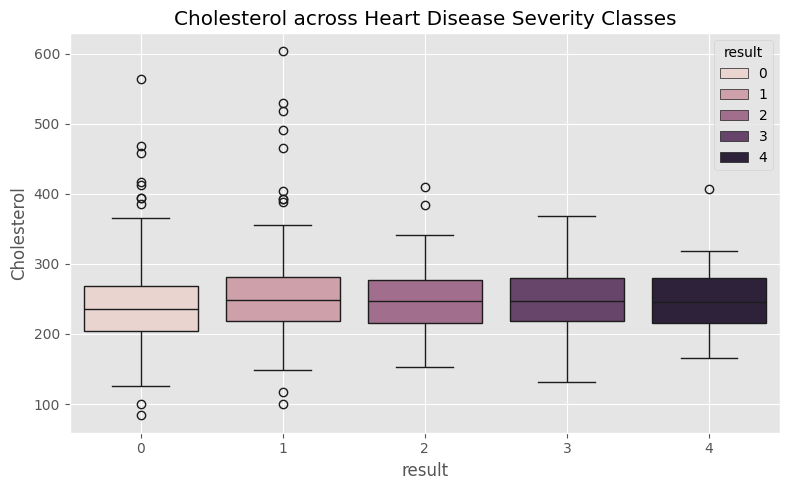

In [149]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='result', y='cholesterol',hue='result')
plt.title('Cholesterol across Heart Disease Severity Classes')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.tight_layout()
plt.show()

### BLOOD SUGAR WITH RESULT

In [150]:
data['have disease']=data['result'].apply(lambda x:0 if x==0 else 1)

In [151]:
data['blood sugar'].unique()

array(['True', 'False'], dtype=object)

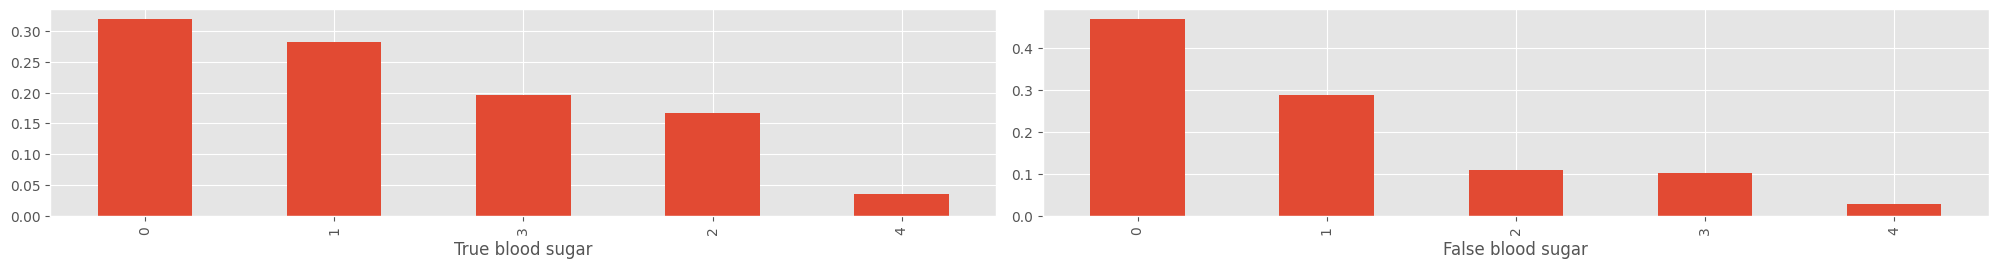

In [152]:
plt.figure(figsize=(20,5))
plt.subplot(2,2,1)
(data[data['blood sugar']=='True']['result'].value_counts()/len(data[data['blood sugar']=='True'])).plot(kind='bar')
plt.xlabel('True blood sugar')
plt.subplot(2,2,2)
(data[data['blood sugar']=='False']['result'].value_counts()/len(data[data['blood sugar']=='False'])).plot(kind='bar')
plt.xlabel('False blood sugar')
plt.tight_layout()
plt.show()

<Axes: xlabel='have disease,blood sugar'>

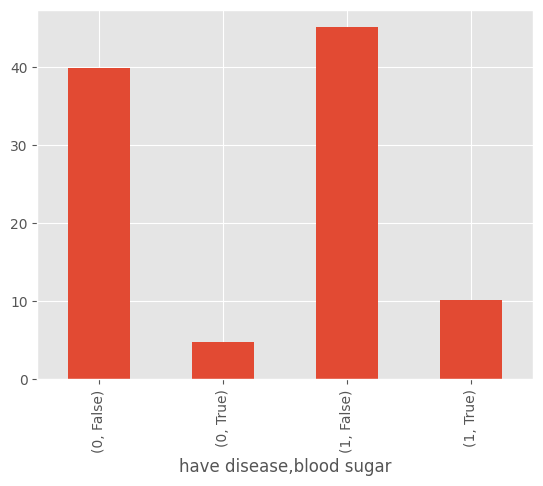

In [153]:
(data.groupby('have disease')['blood sugar'].value_counts()/len(data)*100).plot(kind='bar')

In [154]:
blood_sugar_encoder=LabelEncoder()

In [155]:
data['blood sugar encoded']=pd.DataFrame(blood_sugar_encoder.fit_transform(data['blood sugar']))

In [156]:
corr_and_coef('blood sugar encoded','result',data)

The corelation is:  0.13
The percentage of variability is:  2 %


### ECG WITH RESULT

In [157]:
data['ecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

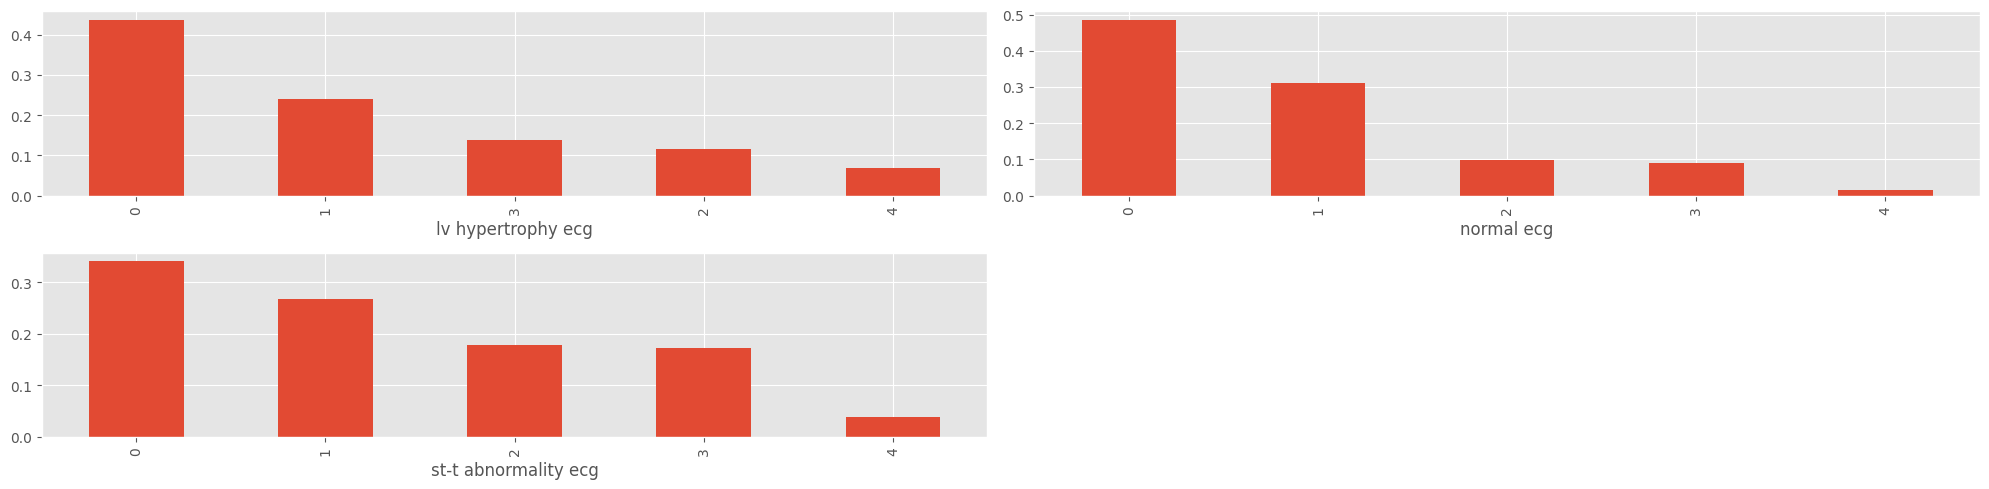

In [158]:
plt.figure(figsize=(20,5))
plt.subplot(2,2,1)
(data[data['ecg']=='lv hypertrophy']['result'].value_counts()/len(data[data['ecg']=='lv hypertrophy'])).plot(kind='bar')
plt.xlabel('lv hypertrophy ecg')
plt.subplot(2,2,2)
(data[data['ecg']=='normal']['result'].value_counts()/len(data[data['ecg']=='normal'])).plot(kind='bar')
plt.xlabel('normal ecg')
plt.subplot(2,2,3)
(data[data['ecg']=='st-t abnormality']['result'].value_counts()/len(data[data['ecg']=='st-t abnormality'])).plot(kind='bar')
plt.xlabel('st-t abnormality ecg')
plt.tight_layout()
plt.show()

<Axes: xlabel='have disease,ecg'>

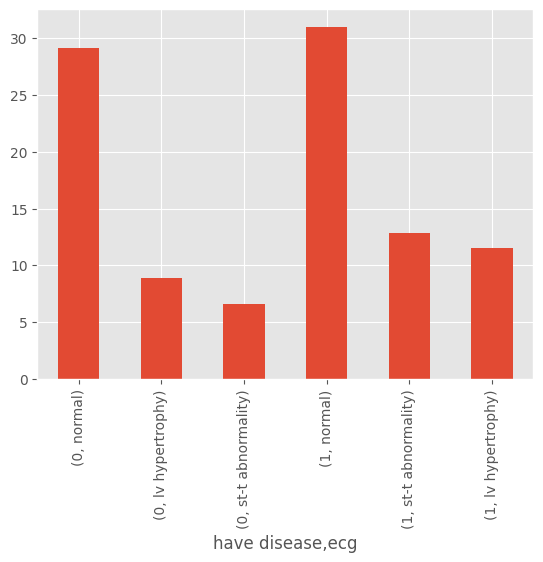

In [159]:
(data.groupby('have disease')['ecg'].value_counts()/len(data)*100).plot(kind='bar')

In [160]:
ecg_encoder=LabelEncoder()

In [161]:
data['encoded ecg']=pd.DataFrame(ecg_encoder.fit_transform(data['ecg']))

In [162]:
corr_and_coef('encoded ecg','result',data)

The corelation is:  0.03
The percentage of variability is:  0 %


### MAX HEART RATE WITH RESULT

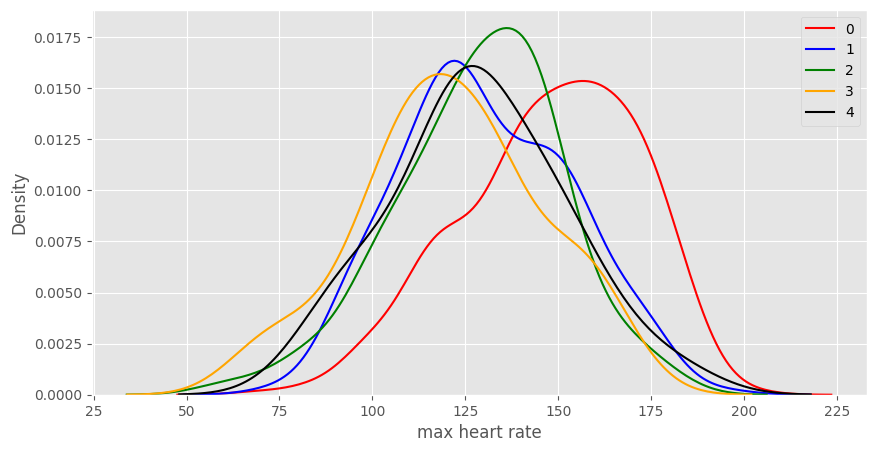

In [163]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data[data['result']==0]['max heart rate'],color='red')
sns.kdeplot(data[data['result']==1]['max heart rate'],color='blue')
sns.kdeplot(data[data['result']==2]['max heart rate'],color='green')
sns.kdeplot(data[data['result']==3]['max heart rate'],color='orange')
sns.kdeplot(data[data['result']==4]['max heart rate'],color='black')
plt.legend('01234')
plt.show()


In [164]:
corr_and_coef('max heart rate','result',data)

The corelation is:  -0.35
The percentage of variability is:  12 %


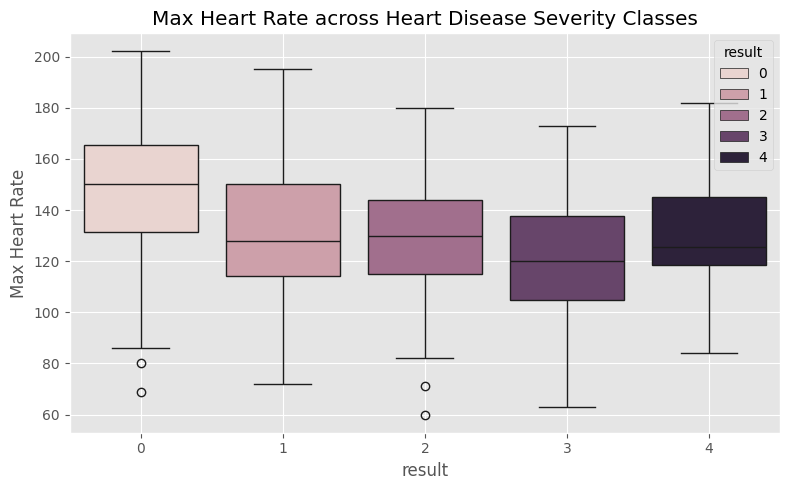

In [165]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='result', y='max heart rate',hue='result')
plt.title('Max Heart Rate across Heart Disease Severity Classes')
plt.ylabel('Max Heart Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

### EXCERCISE ANGINA WITH RESULT

In [166]:
data['excercise angina'].unique()

array(['False', 'True'], dtype=object)

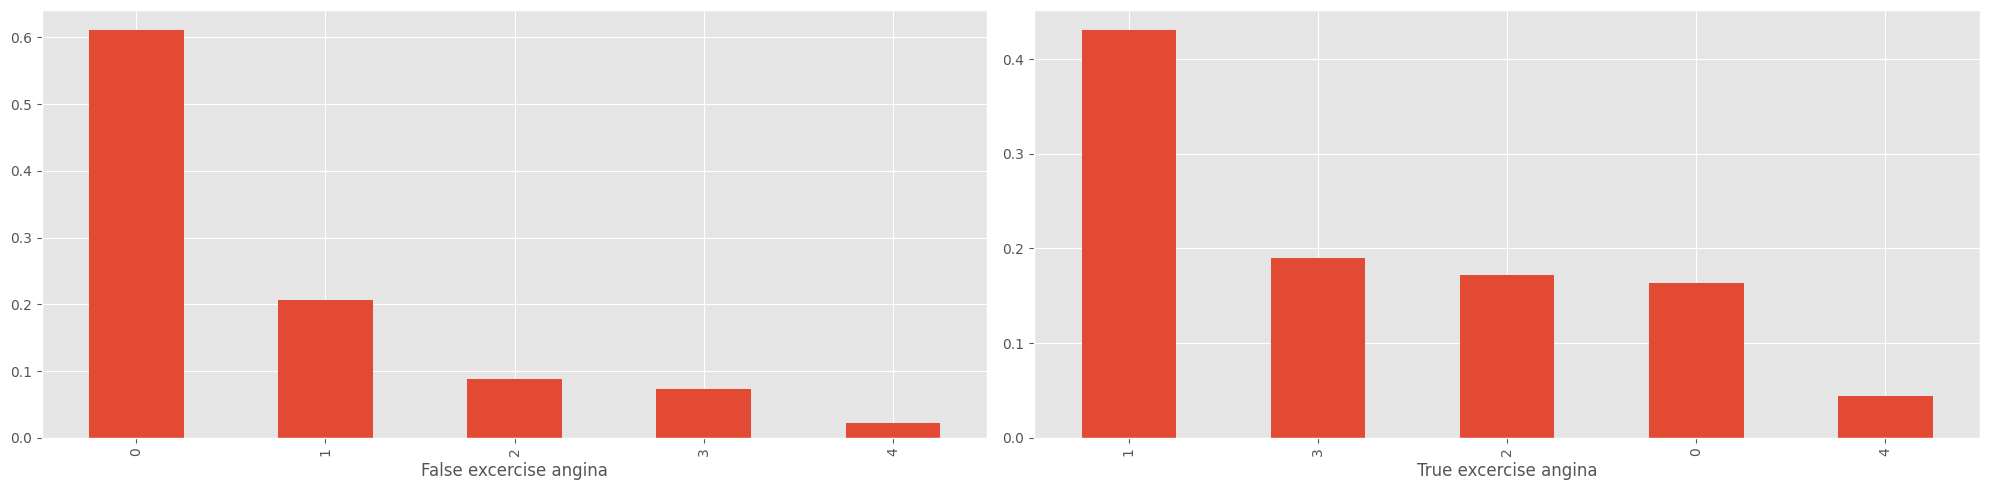

In [167]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
(data[data['excercise angina']=='False']['result'].value_counts()/len(data[data['excercise angina']=='False'])).plot(kind='bar')
plt.xlabel('False excercise angina')
plt.subplot(1,2,2)
(data[data['excercise angina']=='True']['result'].value_counts()/len(data[data['excercise angina']=='True'])).plot(kind='bar')
plt.xlabel('True excercise angina')
plt.tight_layout()
plt.show()

In [168]:
exc_angina_encoder=LabelEncoder()

In [169]:
data['encoded excercise angina']=pd.DataFrame(exc_angina_encoder.fit_transform(data['excercise angina']))

In [170]:
corr_and_coef('encoded excercise angina','result',data)

The corelation is:  0.35
The percentage of variability is:  12 %


### ST DEPRESSSION WITH RESULT

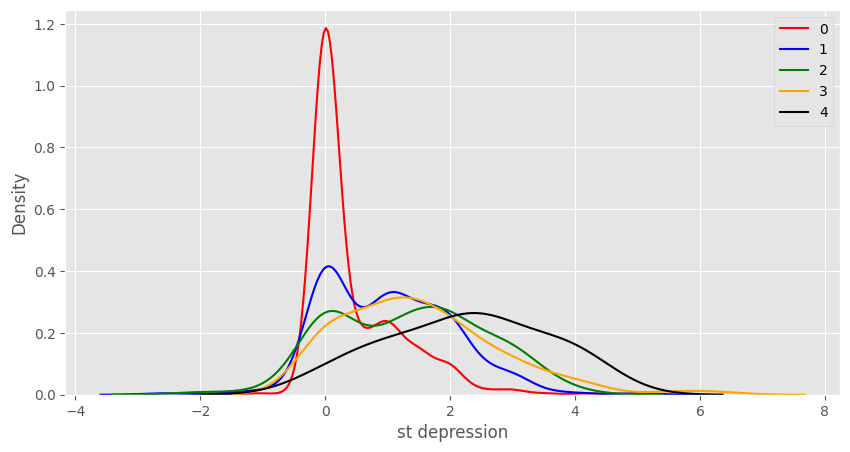

In [171]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data[data['result']==0]['st depression'],color='red')
sns.kdeplot(data[data['result']==1]['st depression'],color='blue')
sns.kdeplot(data[data['result']==2]['st depression'],color='green')
sns.kdeplot(data[data['result']==3]['st depression'],color='orange')
sns.kdeplot(data[data['result']==4]['st depression'],color='black')
plt.legend('01234')
plt.show()


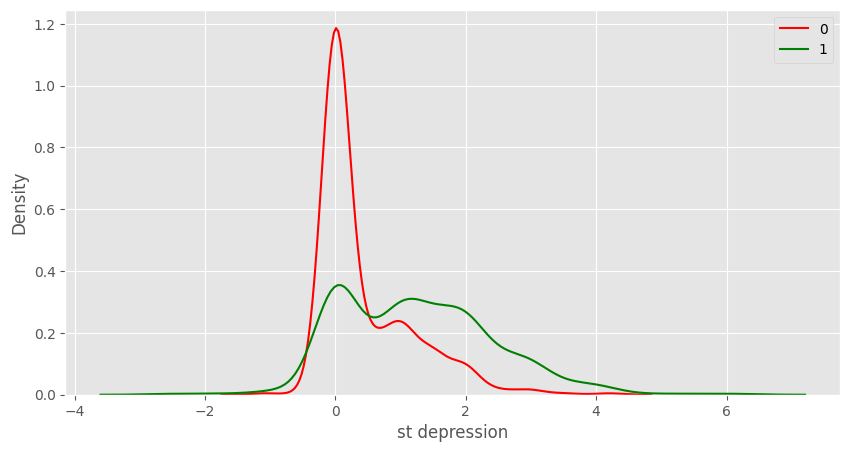

In [172]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data[data['result']==0]['st depression'],color='red')
sns.kdeplot(data[data['result']!=0]['st depression'],color='green')
plt.legend('01')
plt.show()

In [173]:
corr_and_coef('st depression','result',data)

The corelation is:  0.43
The percentage of variability is:  18 %


### SLOPE WITH RESULT

In [174]:
data['slope'].unique()

array(['downsloping', 'flat', 'upsloping', 'undefined'], dtype=object)

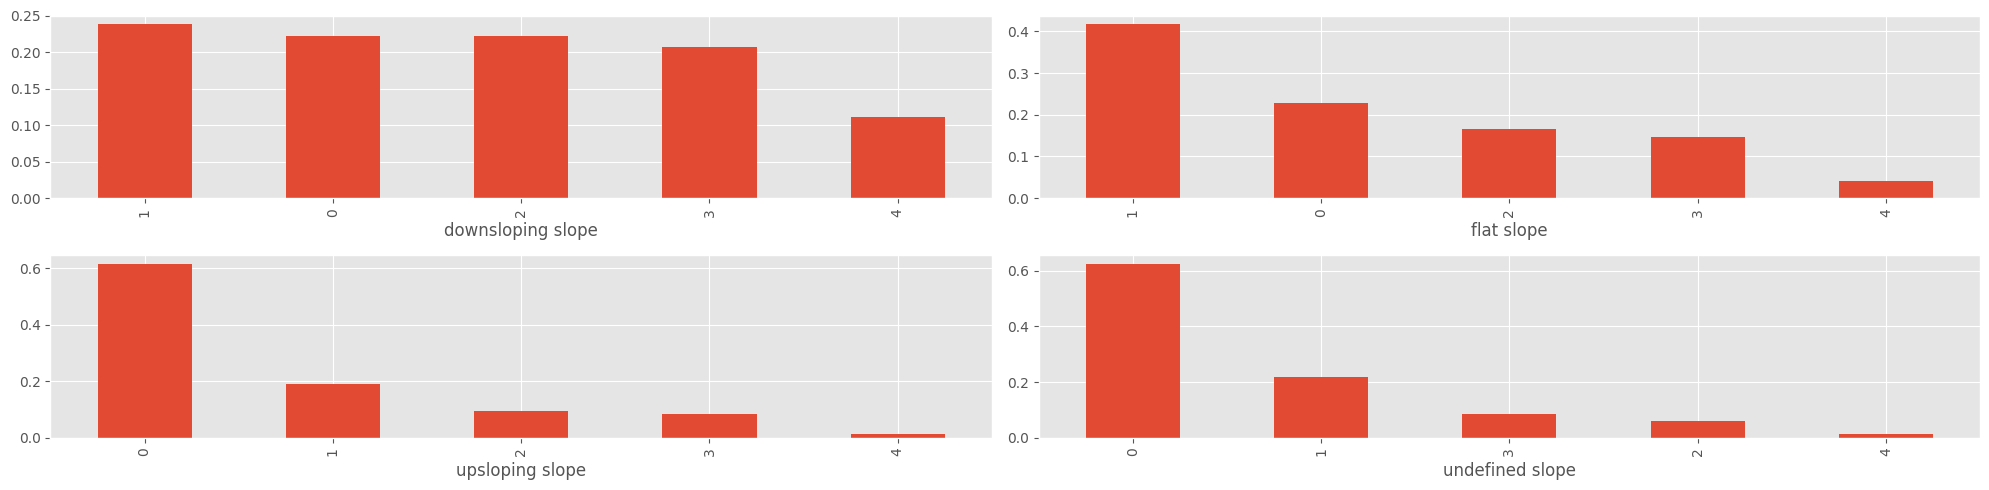

In [175]:
plt.figure(figsize=(20,5))
plt.subplot(2,2,1)
(data[data['slope']=='downsloping']['result'].value_counts()/len(data[data['slope']=='downsloping'])).plot(kind='bar')
plt.xlabel('downsloping slope')
plt.subplot(2,2,2)
(data[data['slope']=='flat']['result'].value_counts()/len(data[data['slope']=='flat'])).plot(kind='bar')
plt.xlabel('flat slope')
plt.subplot(2,2,3)
(data[data['slope']=='upsloping']['result'].value_counts()/len(data[data['slope']=='upsloping'])).plot(kind='bar')
plt.xlabel('upsloping slope')
plt.subplot(2,2,4)
(data[data['slope']=='undefined']['result'].value_counts()/len(data[data['slope']=='undefined'])).plot(kind='bar')
plt.xlabel('undefined slope')
plt.tight_layout()
plt.show()

In [176]:
slope_encoder=LabelEncoder()

In [177]:
data['slope encoded']=pd.DataFrame(slope_encoder.fit_transform(data['slope']))

In [178]:
corr_and_coef('slope encoded','result',data)

The corelation is:  -0.3
The percentage of variability is:  9 %


### AFFECTED CORONARY WITH RESULT

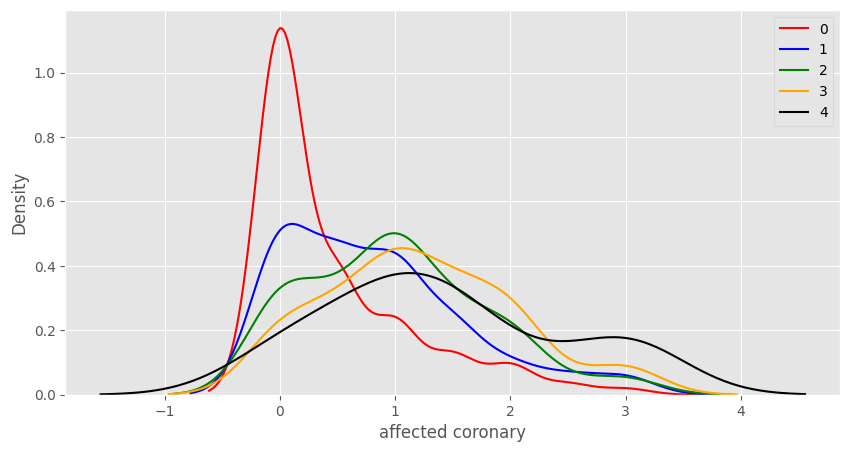

In [179]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data[data['result']==0]['affected coronary'],color='red')
sns.kdeplot(data[data['result']==1]['affected coronary'],color='blue')
sns.kdeplot(data[data['result']==2]['affected coronary'],color='green')
sns.kdeplot(data[data['result']==3]['affected coronary'],color='orange')
sns.kdeplot(data[data['result']==4]['affected coronary'],color='black')
plt.legend('01234')
plt.show()


In [180]:
data['affected coronary'].unique()

array([0. , 3. , 2. , 1. , 0.5, 2.5, 1.5])

In [181]:
corr_and_coef('affected coronary','result',data)

The corelation is:  0.36
The percentage of variability is:  13 %


### THALASSEMIA WITH RESULT

In [182]:
data['thalassemia'].unique()

array(['fixed defect', 'normal', 'reversable defect', 'undefined'],
      dtype=object)

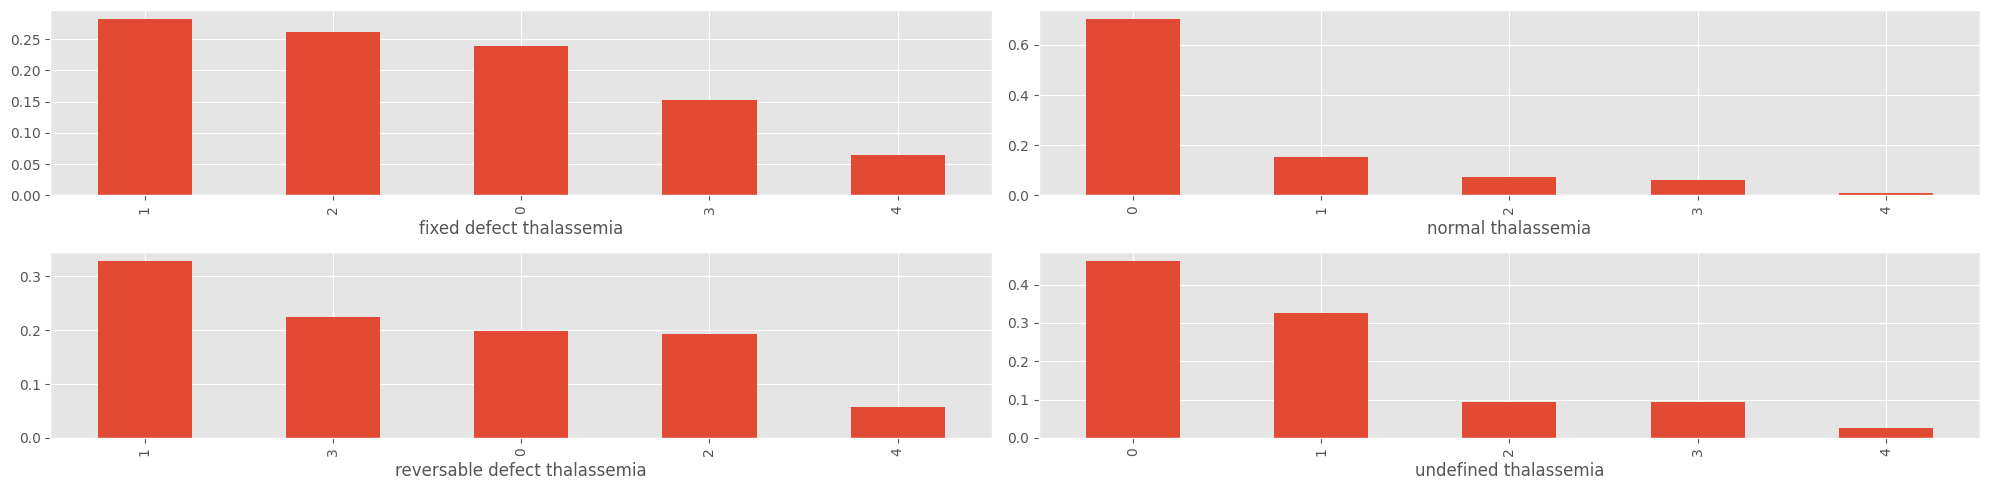

In [183]:
plt.figure(figsize=(20,5))
plt.subplot(2,2,1)
(data[data['thalassemia']=='fixed defect']['result'].value_counts()/len(data[data['thalassemia']=='fixed defect'])).plot(kind='bar')
plt.xlabel('fixed defect thalassemia')
plt.subplot(2,2,2)
(data[data['thalassemia']=='normal']['result'].value_counts()/len(data[data['thalassemia']=='normal'])).plot(kind='bar')
plt.xlabel('normal thalassemia')
plt.subplot(2,2,3)
(data[data['thalassemia']=='reversable defect']['result'].value_counts()/len(data[data['thalassemia']=='reversable defect'])).plot(kind='bar')
plt.xlabel('reversable defect thalassemia')
plt.subplot(2,2,4)
(data[data['thalassemia']=='undefined']['result'].value_counts()/len(data[data['thalassemia']=='undefined'])).plot(kind='bar')
plt.xlabel('undefined thalassemia')
plt.tight_layout()
plt.show()

In [184]:
thal_encoder=LabelEncoder()

In [185]:
data['thalassemia encoded']=pd.DataFrame(thal_encoder.fit_transform(data['thalassemia']))

In [186]:
corr_and_coef('thalassemia encoded','result',data)

The corelation is:  -0.01
The percentage of variability is:  0 %


## MORE ANALYSIS TO SUPPORT MY CONCLUSIONS

<Axes: >

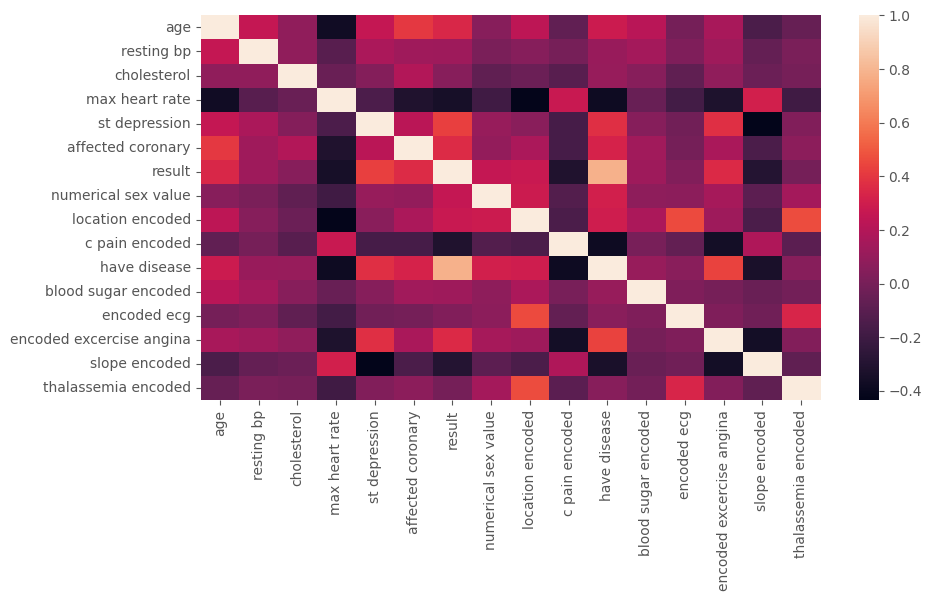

In [187]:
plt.figure(figsize=(10,5))
sns.color_palette("cubehelix", as_cmap=True)
sns.heatmap(data.corr(numeric_only=True),annot=False)

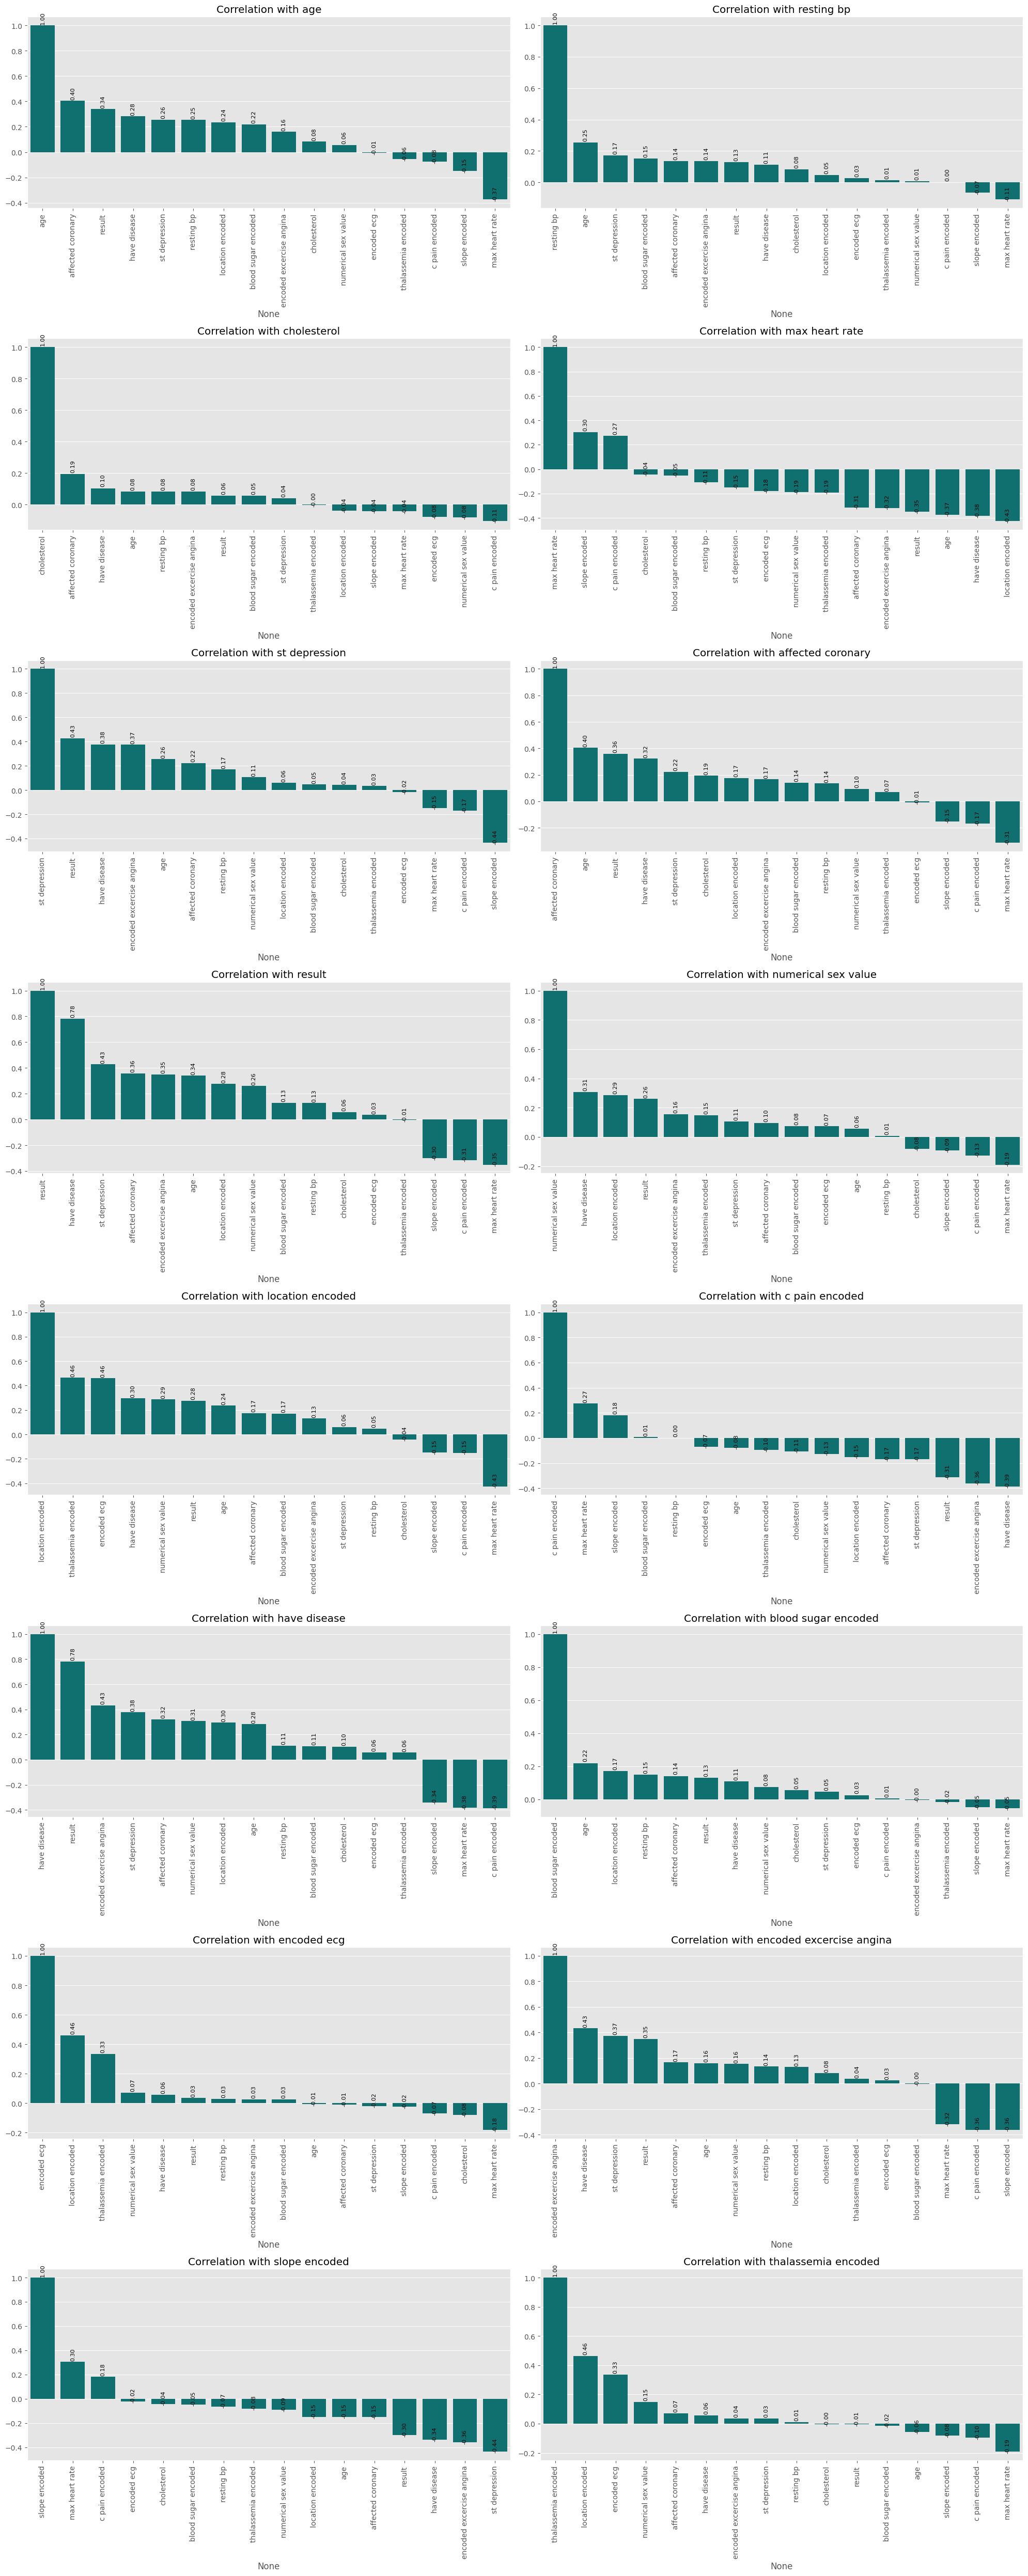

In [188]:
columns = list(data.select_dtypes(include='number').columns)
plt.figure(figsize=(20, 50))

for i, col in enumerate(columns):
    plt.subplot(8, 2, i + 1)

    # Prepare data for plotting
    corr_values = data.corr(numeric_only=True)[col].sort_values(ascending=False)
    sns.barplot(x=corr_values.index, y=corr_values.values, color="teal")

    plt.xticks(rotation=90)
    plt.title(f'Correlation with {col}')

    # Add text on top of each bar
    for j, val in enumerate(corr_values.values):
        plt.text(j, val + 0.01 * np.sign(val), f'{val:.2f}', ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()

## Conclusion - 1

<Axes: xlabel='age', ylabel='affected coronary'>

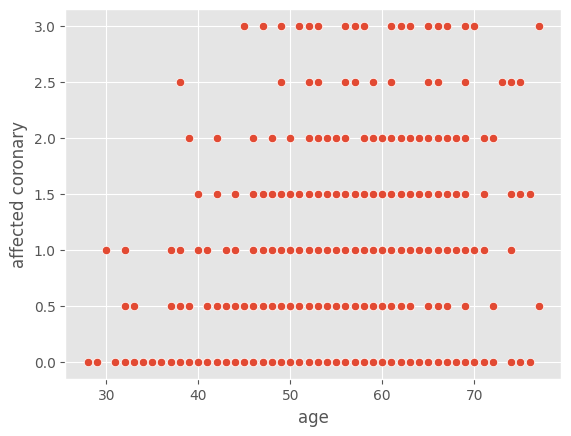

In [189]:
sns.scatterplot(x='age',y='affected coronary',data=data)

## Conclusion - 2

<Axes: xlabel='max heart rate', ylabel='age'>

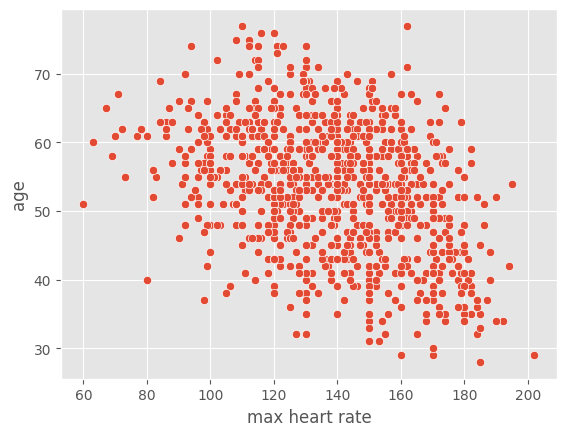

In [190]:
sns.scatterplot(x='max heart rate',y='age',data=data)

## Conclusion - 3

<Axes: xlabel='sex'>

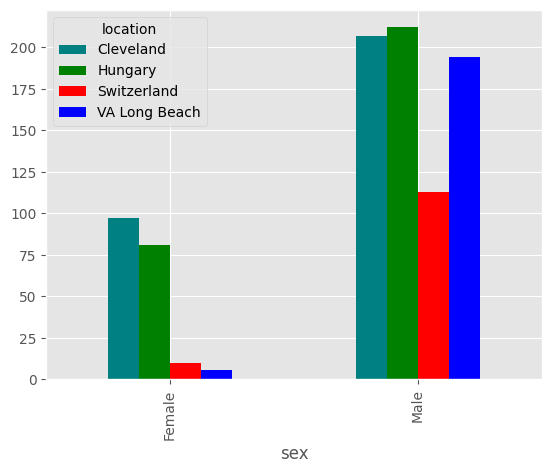

In [191]:
pd.crosstab(data['sex'],data['location']).plot(kind='bar',color=['teal','green','red','blue'])

<Axes: xlabel='c pain type'>

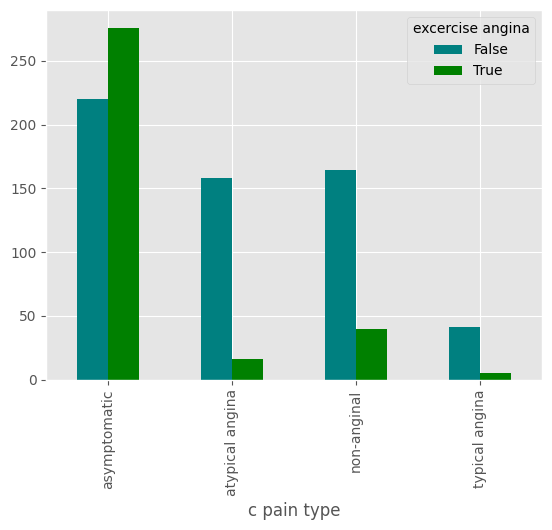

In [192]:
pd.crosstab(data['c pain type'],data['excercise angina']).plot(kind='bar',color=['teal','green','red','blue'])

<Axes: xlabel='resting bp', ylabel='age'>

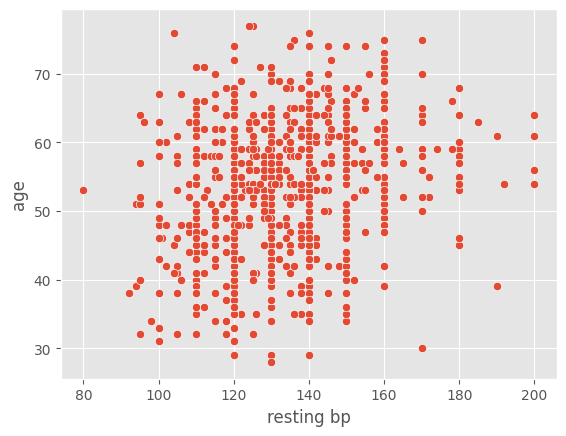

In [193]:
sns.scatterplot(x='resting bp',y='age',data=data)

<Axes: xlabel='st depression', ylabel='Density'>

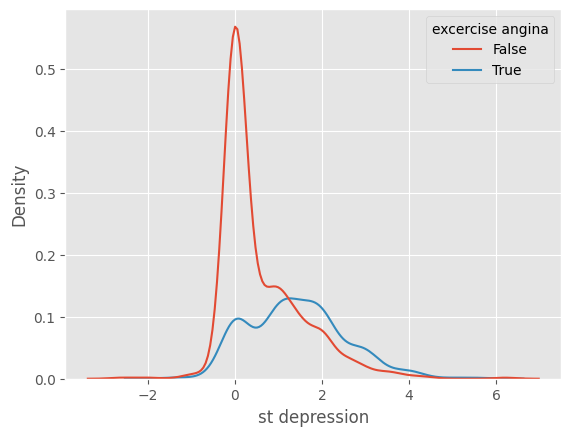

In [194]:
sns.kdeplot(x='st depression',hue='excercise angina',data=data)

<Axes: xlabel='excercise angina', ylabel='st depression'>

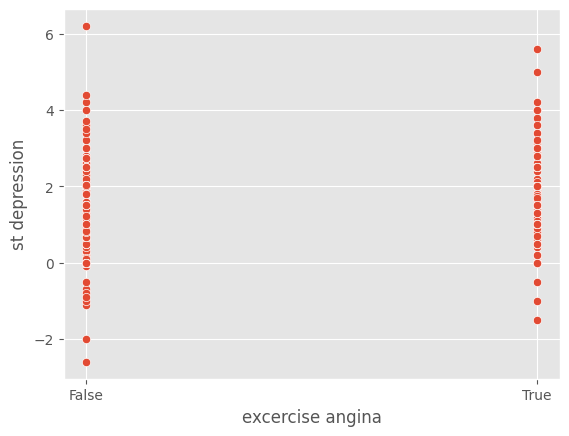

In [195]:
sns.scatterplot(x='excercise angina',y='st depression',data=data)

<Axes: xlabel='max heart rate', ylabel='Density'>

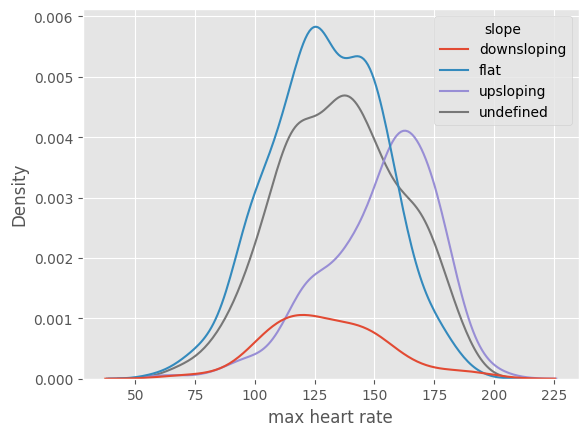

In [196]:
sns.kdeplot(x='max heart rate',hue='slope',data=data)

<Axes: xlabel='thalassemia'>

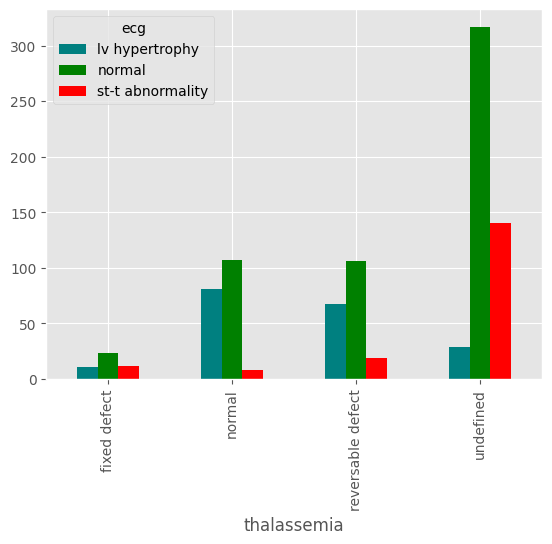

In [197]:
pd.crosstab(data['thalassemia'],data['ecg']).plot(kind='bar',color=['teal','green','red','blue'])

In [198]:
data.corr(numeric_only=True)['have disease'].sort_values(ascending=False)

have disease                1.000000
result                      0.783387
encoded excercise angina    0.433605
st depression               0.376551
affected coronary           0.321996
numerical sex value         0.307284
location encoded            0.295696
age                         0.282700
resting bp                  0.111780
blood sugar encoded         0.108071
cholesterol                 0.103441
encoded ecg                 0.058783
thalassemia encoded         0.056516
slope encoded              -0.339925
max heart rate             -0.383295
c pain encoded             -0.385077
Name: have disease, dtype: float64

In [199]:
data.columns

Index(['age', 'sex', 'location', 'c pain type', 'resting bp', 'cholesterol',
       'blood sugar', 'ecg', 'max heart rate', 'excercise angina',
       'st depression', 'slope', 'affected coronary', 'thalassemia', 'result',
       'numerical sex value', 'location encoded', 'c pain encoded',
       'have disease', 'blood sugar encoded', 'encoded ecg',
       'encoded excercise angina', 'slope encoded', 'thalassemia encoded'],
      dtype='object')

In [200]:
data.drop(columns=['numerical sex value', 'location encoded', 'blood sugar encoded','encoded ecg', 'encoded excercise angina',
       'slope encoded', 'thalassemia encoded', 'c pain encoded'],inplace=True)

In [201]:
data.shape

(920, 16)

In [202]:
data.columns

Index(['age', 'sex', 'location', 'c pain type', 'resting bp', 'cholesterol',
       'blood sugar', 'ecg', 'max heart rate', 'excercise angina',
       'st depression', 'slope', 'affected coronary', 'thalassemia', 'result',
       'have disease'],
      dtype='object')

In [203]:
data.drop('result',axis=1,inplace=True)

In [204]:
data.head()

,age,sex,location,c pain type,resting bp,cholesterol,blood sugar,ecg,max heart rate,excercise angina,st depression,slope,affected coronary,thalassemia,have disease
0,63,Male,Cleveland,typical angina,145,233.0,True,lv hypertrophy,150,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160,286.0,False,lv hypertrophy,108,True,1.5,flat,3.0,normal,1
2,67,Male,Cleveland,asymptomatic,120,229.0,False,lv hypertrophy,129,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130,250.0,False,normal,187,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130,204.0,False,lv hypertrophy,172,False,1.4,upsloping,0.0,normal,0


In [205]:
data.head()

,age,sex,location,c pain type,resting bp,cholesterol,blood sugar,ecg,max heart rate,excercise angina,st depression,slope,affected coronary,thalassemia,have disease
0,63,Male,Cleveland,typical angina,145,233.0,True,lv hypertrophy,150,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160,286.0,False,lv hypertrophy,108,True,1.5,flat,3.0,normal,1
2,67,Male,Cleveland,asymptomatic,120,229.0,False,lv hypertrophy,129,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130,250.0,False,normal,187,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130,204.0,False,lv hypertrophy,172,False,1.4,upsloping,0.0,normal,0


In [206]:
data.to_csv("UCI Heart Data Cleaned.csv")

In [207]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [208]:
X_train,X_test,y_train,y_test=train_test_split(data.drop('have disease',axis=1),data['have disease'],test_size=0.2,random_state=45)

In [209]:
y_train

100    0
466    0
197    0
116    0
349    0
      ..
607    1
544    1
892    1
643    1
414    0
Name: have disease, Length: 736, dtype: int64

In [210]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(736, 14)
(736,)
(184, 14)


In [211]:
X_train.sample(1)

,age,sex,location,c pain type,resting bp,cholesterol,blood sugar,ecg,max heart rate,excercise angina,st depression,slope,affected coronary,thalassemia
890,53,Male,VA Long Beach,asymptomatic,124,243.0,False,normal,122,True,2.0,flat,0.5,reversable defect


In [212]:
ohe=OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore')

In [213]:
ohe_transformer=ColumnTransformer(transformers=[
    ('ohe',ohe,[1,2,3,6,7,9,11,13])
],remainder='passthrough')

In [214]:
forest_model=RandomForestClassifier()

In [215]:
forest_pipe=Pipeline([
    ('ohe',ohe_transformer),
    ('forest_model',forest_model)
])

In [216]:
forest_pipe.fit(X_train,y_train)

Pipeline(steps=[('ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 2, 3, 6, 7, 9, 11,
                                                   13])])),
                ('forest_model', RandomForestClassifier())])

In [217]:
forest_prediction=forest_pipe.predict(X_test)

In [218]:
accuracy_score(forest_prediction,y_test)

0.8206521739130435

In [219]:
print(classification_report(forest_prediction,y_test))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78        78
           1       0.83      0.87      0.85       106

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184



In [220]:
data.columns

Index(['age', 'sex', 'location', 'c pain type', 'resting bp', 'cholesterol',
       'blood sugar', 'ecg', 'max heart rate', 'excercise angina',
       'st depression', 'slope', 'affected coronary', 'thalassemia',
       'have disease'],
      dtype='object')

In [221]:
confusion_matrix(forest_prediction,y_test)

array([[59, 19],
       [14, 92]])

In [222]:
input_data = {
    'age': 65,
    'sex': 'male',
    'location': 'switzerland',
    'c pain type': 'asymptomatic',
    'resting bp': 140,
    'cholesterol': 280,
    'blood sugar': 'true',
    'ecg': 'normal',
    'max heart rate': 115,
    'excercise angina': 'true',
    'st depression': 2.3,
    'slope': 'downsloping',
    'affected coronary': 2.5,
    'thalassemia': 'fixed defect'
}

In [223]:
forest_pipe.predict(pd.DataFrame([input_data]))

C:\Users\Rano's PC\Machine\virtualenv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 3, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([1])